#### TESTS

In [1]:
# %matplotlib widget
import sys, os, importlib
package_path = os.path.abspath('..')    
if package_path not in sys.path:
    sys.path.append(package_path)
from package import functions as fn
from package import model as rm
from package import optimizer as opt
from package import plots
import numpy as np
from obspy.taup import TauPyModel

#### Random

Seed: 2025
Original params:  [323.15320522  70.48878334  46.58297979]


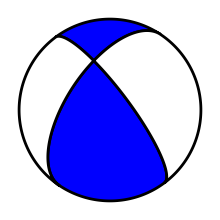

Run 0 of 50
Run 10 of 50
Run 20 of 50
Run 30 of 50
Run 40 of 50
Convergence rate: 98%
Constrained axis: T
Optimal parameters: [88.42868597 42.82118221  5.06043019]
Search error: 0.04167447696459496 degrees


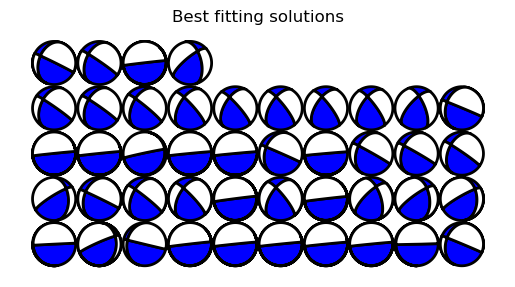

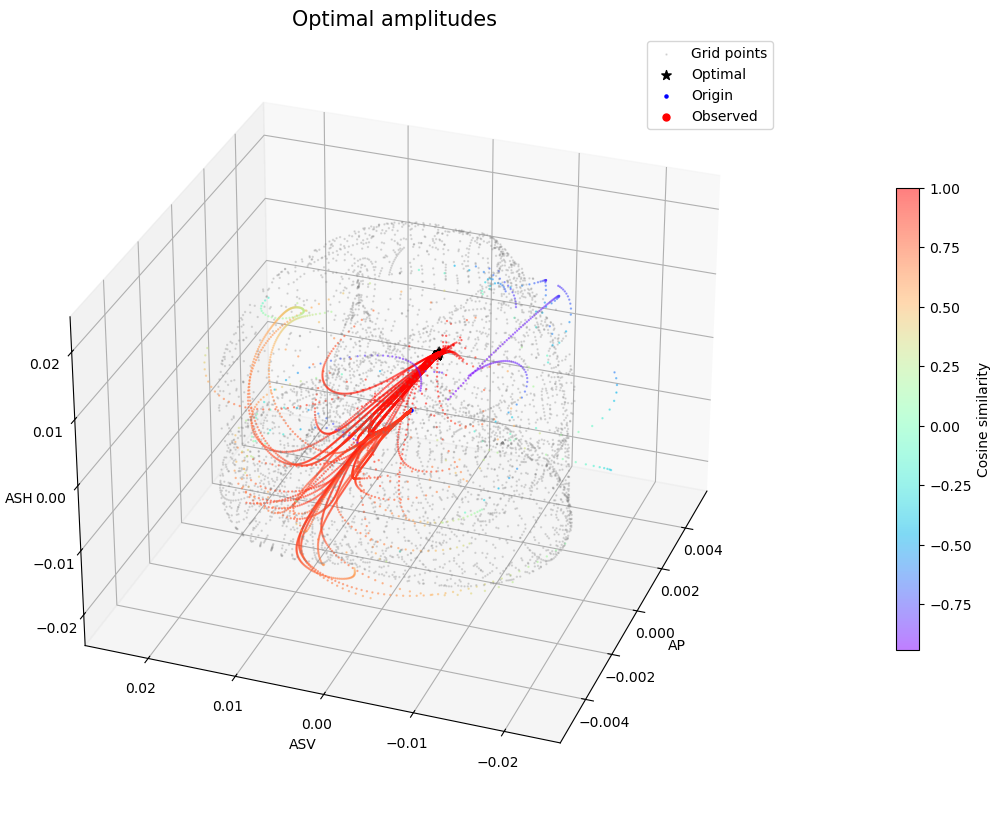

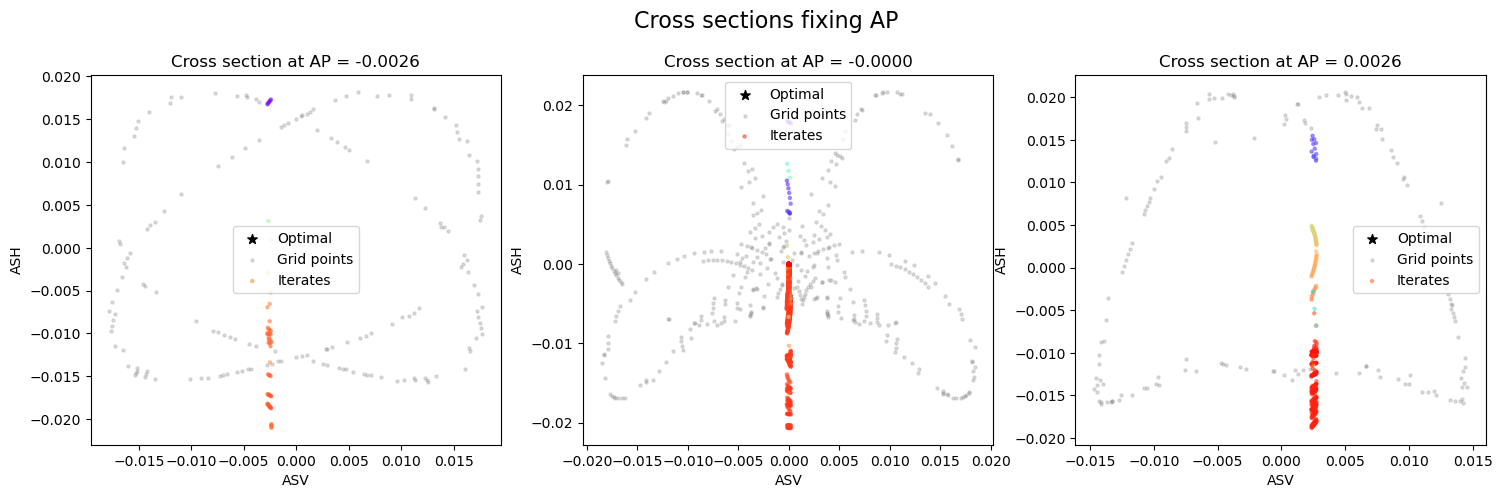

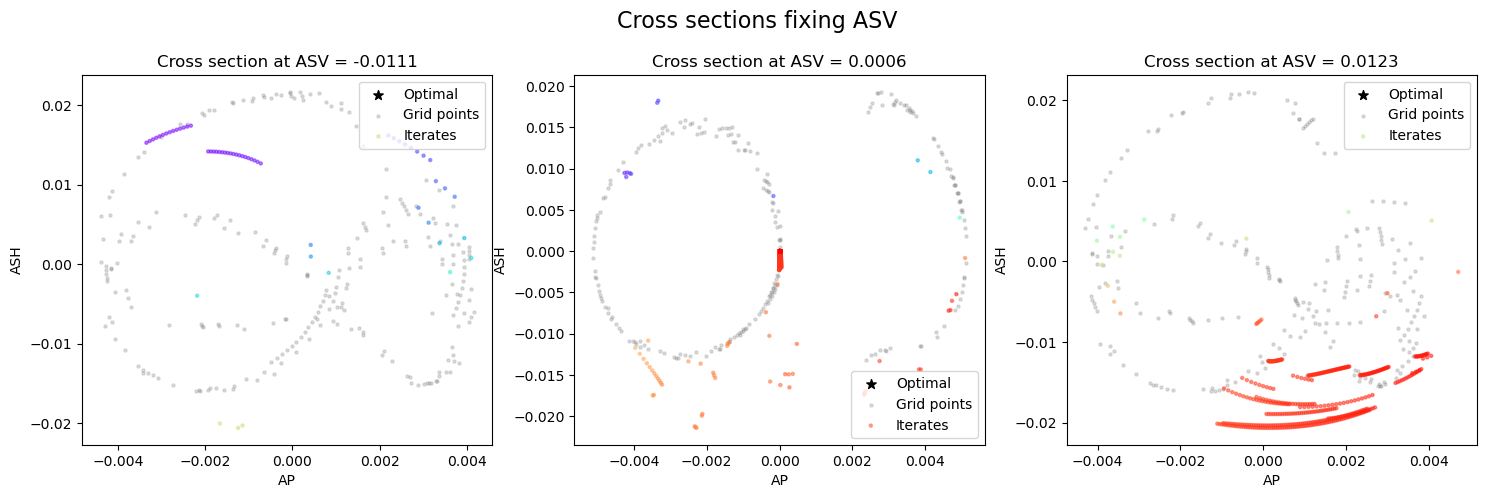

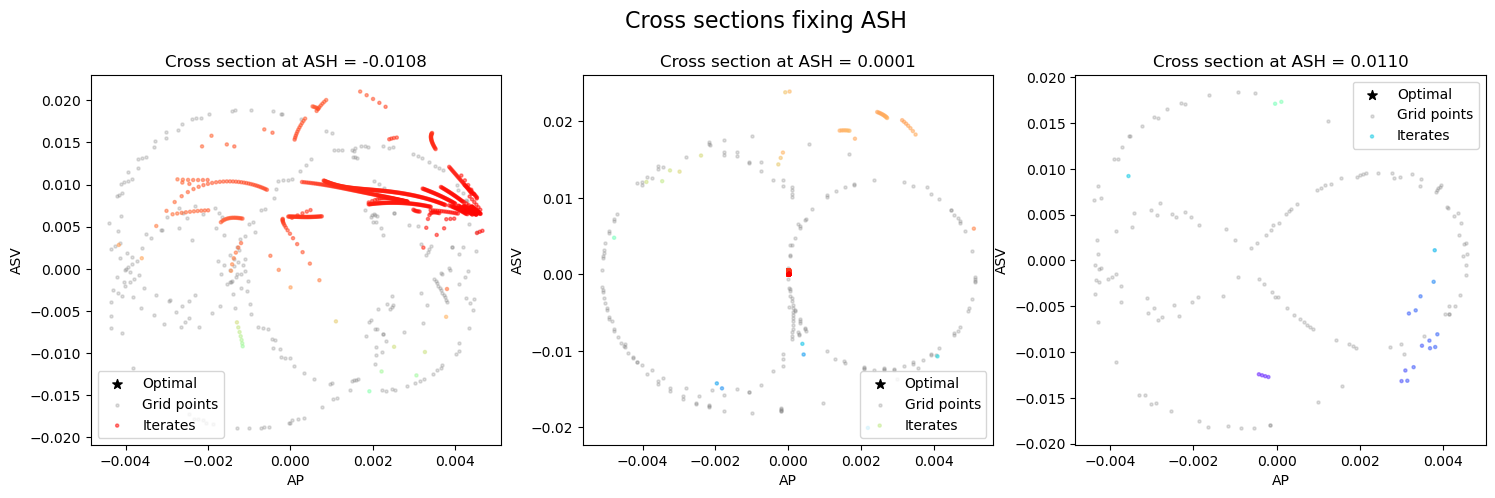

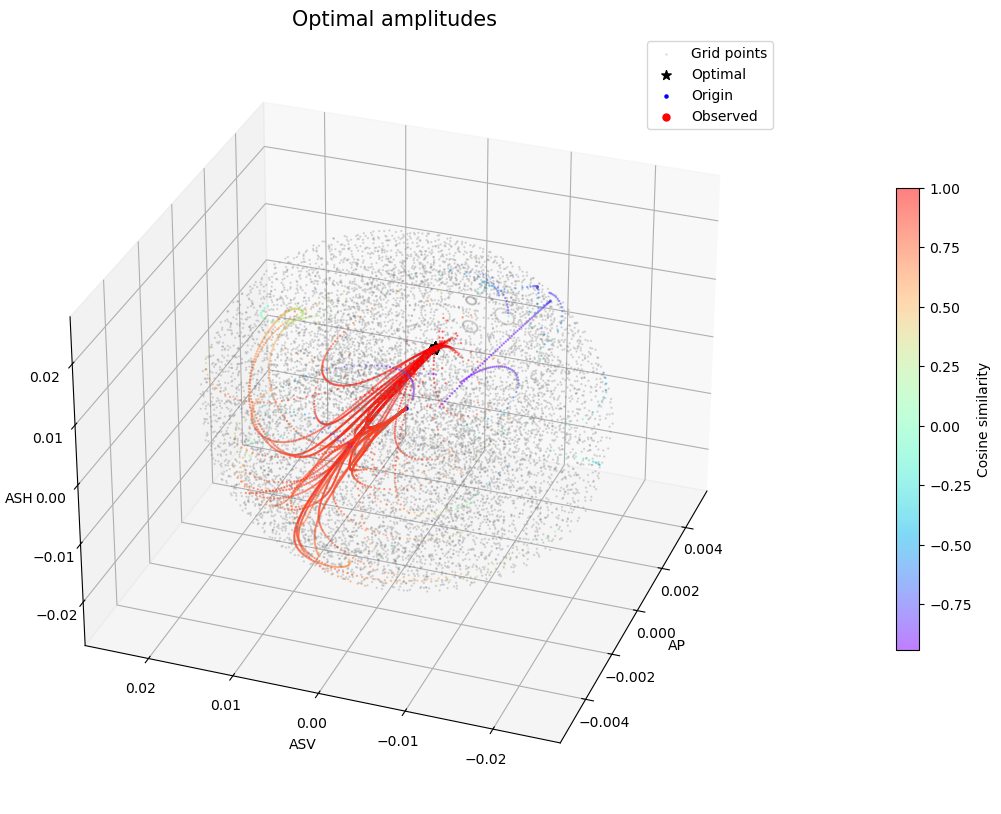

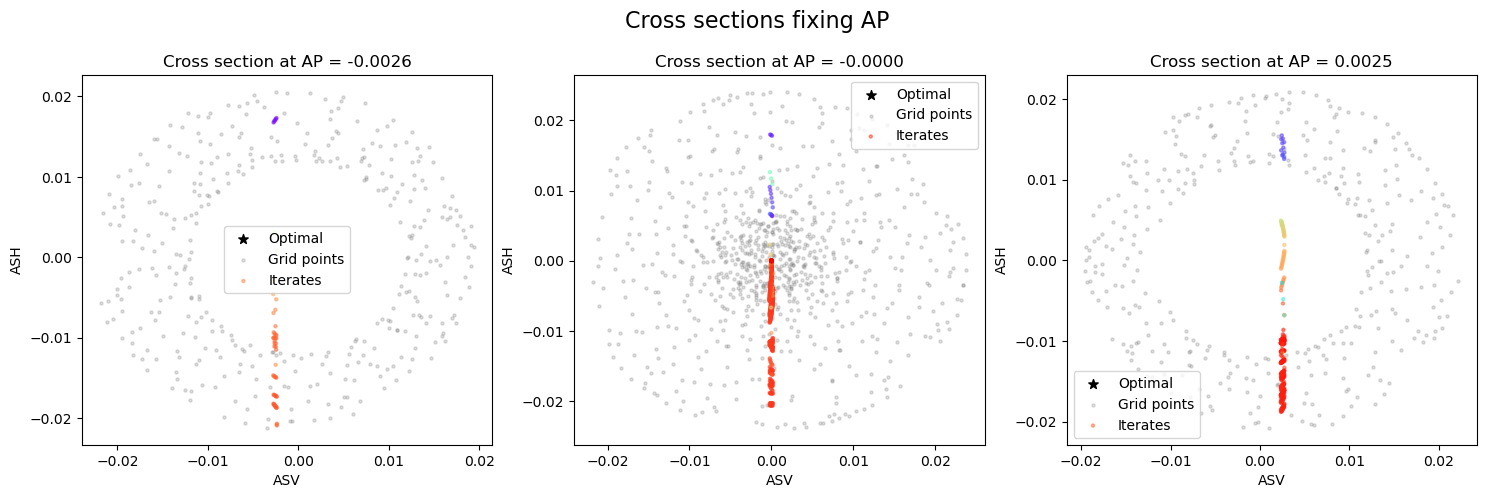

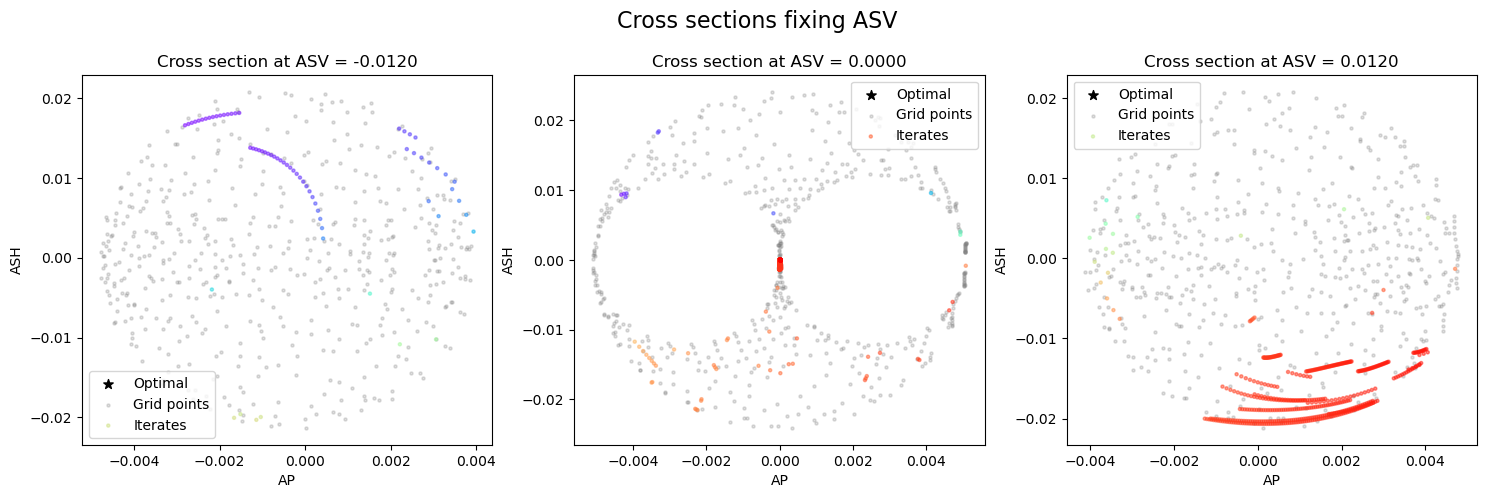

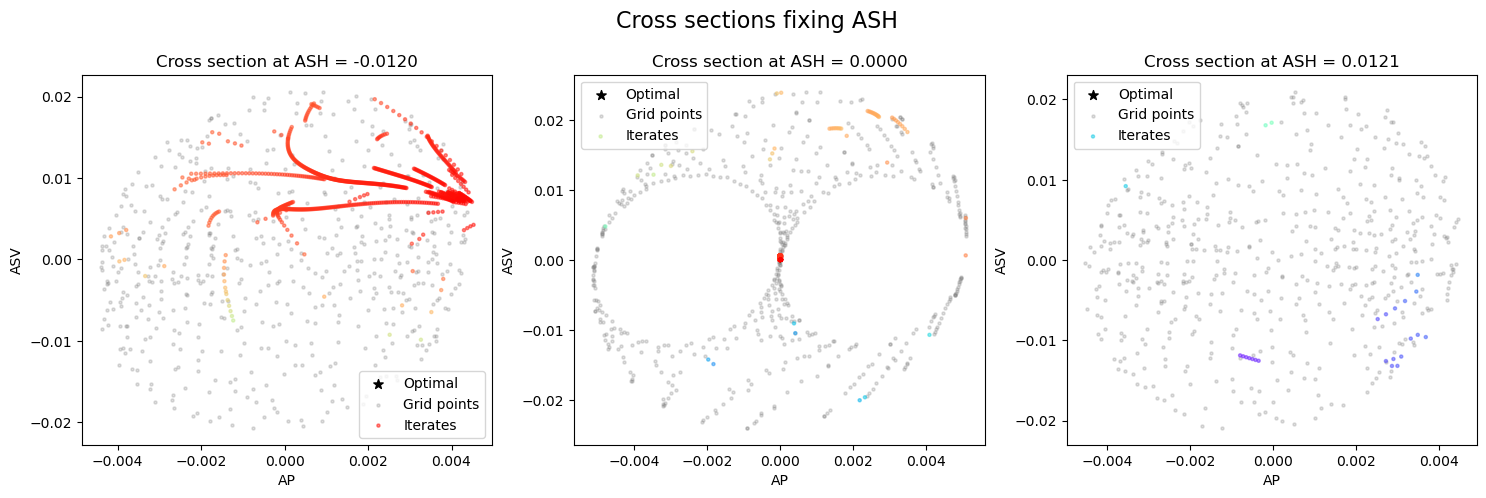

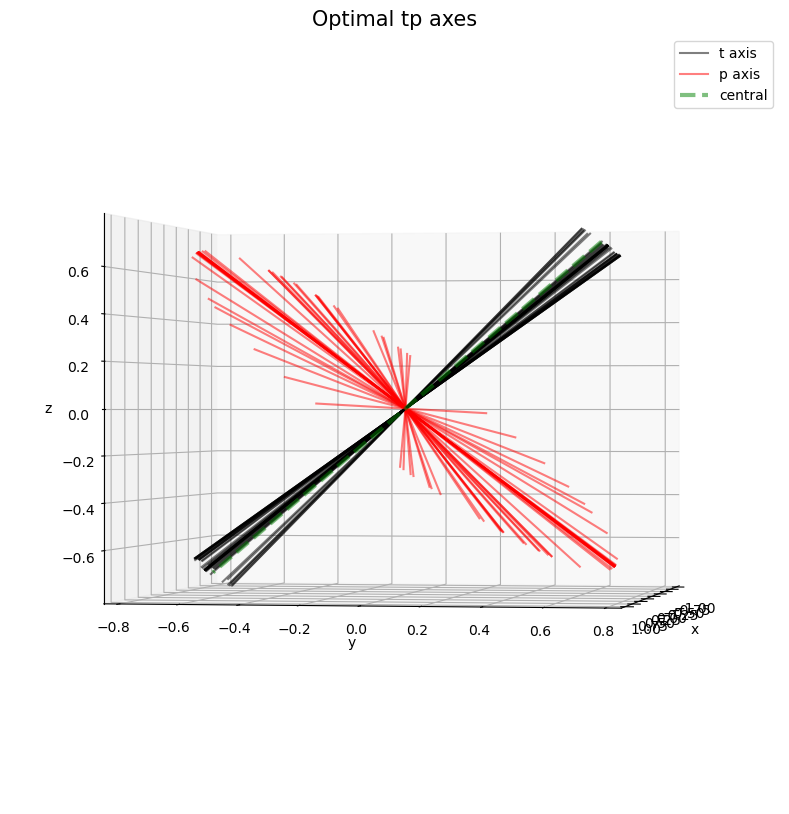

In [2]:
seed = 2025
np.random.seed(seed)
print(f'Seed: {seed}')

# create random array for t, normalised to 1
t = fn.unit_vec(np.random.rand(3))

# create random array for p, normalised to 1
direc = fn.unit_vec(np.random.rand(3))
p = fn.starting_direc(t, direc)

# get true params for synthetic test
true_params = fn.tp2sdr(t, p, True)[0]
print('Original params: ', true_params)

# plot corresponding beachball
beachball = fn.beachball(true_params)

# set up parameters for inversion
model = TauPyModel(model='ak135')  # velocity model
# model = TauPyModel(model='iasp...')
hdepth = 15  # km - assumed quake depth
epdist = 10  # degrees - epicentral distance
azimuth = 200  # degrees - azimuth of seismometer
p_arrivals = model.get_travel_times(source_depth_in_km=hdepth,
                        distance_in_degree=epdist, phase_list=['P'])
s_arrivals = model.get_travel_times(source_depth_in_km=hdepth,
                        distance_in_degree=epdist, phase_list=['S'])
takeoff_angles = [p_arrivals[0].takeoff_angle, s_arrivals[0].takeoff_angle]

# for other depths, extract velocities from lookup table
velocities = np.array([5.8000, 3.4600])

# initialize model
radiation_model = rm.RadiationModel(np.deg2rad(azimuth),
                                    takeoff_angles, velocities)

model_Ao = radiation_model(np.deg2rad(true_params), set_Ao=True,
                           return_A=True)

# tune hyperparameters
config = opt.get_config()

# multistart optimization
num_starts = 50
starts = fn.random_params(num_starts)

radiation_model.reset()
print_every = 10

for index, start in enumerate(starts):
    if print_every > 0 and index % print_every == 0:
        print(f'Run {index} of {num_starts}')
    opt.minimize(radiation_model, config, start)
    
print(f'Convergence rate: {radiation_model.get_convergence_rate():.0f}%')

# the dense parameterization in one space
params, error, position = radiation_model.get_optimal_parameters(z_threshold=2)
name = 'T' if position == 0 else 'P'

print(f'Constrained axis: {name}')
print(f'Optimal parameters: {np.rad2deg(params)}')
print(f'Search error: {np.rad2deg(error)} degrees')

# plots.half_angles(radiation_model, bins=10)

# best-fitting mechanisms
plots.beachballs(radiation_model, central=False, order_by='strike')

# fix parameters (mechanism), vary hyperparameters (station location)
radiation_model.reset_grid_amplitudes()
radiation_model.set_grid_amplitudes(3, random=False, fix_params=True)
plots.amplitudes(radiation_model, azim=200, elev=30, s=50, alpha=0.5,
                 iterates=True, grid=True, cross_section=[3,3,3],
                 eps_factor=2e-2, optimal=True, observed=True)

# fix hyperparameters (station location), vary parameters (mechanism)
radiation_model.reset_grid_amplitudes()
radiation_model.set_grid_amplitudes(7, random=False, fix_params=False)
plots.amplitudes(radiation_model, azim=200, elev=30, s=50, alpha=0.5,
                 iterates=True, grid=True, cross_section=[3,3,3],
                 eps_factor=2e-2, optimal=True, observed=True)

# tp axes, enz coordinates not yet implemented
plots.tp_axes(radiation_model, azim=10, elev=00, half=False, central=False)

#### Reverse

Seed: 2025
Original params:  [ 0. 45. 90.]


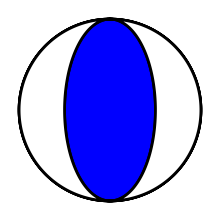

Run 0 of 50
Run 10 of 50
Run 20 of 50
Run 30 of 50
Run 40 of 50
Convergence rate: 84%
Constrained axis: T
Optimal parameters: [141.47711817  18.55096316  17.50651608]
Search error: 0.6784261024639548 degrees


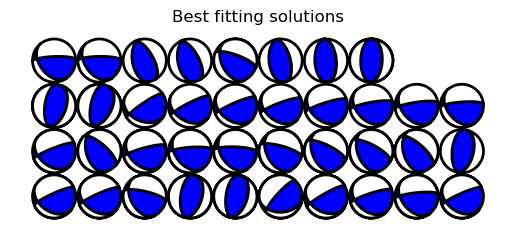

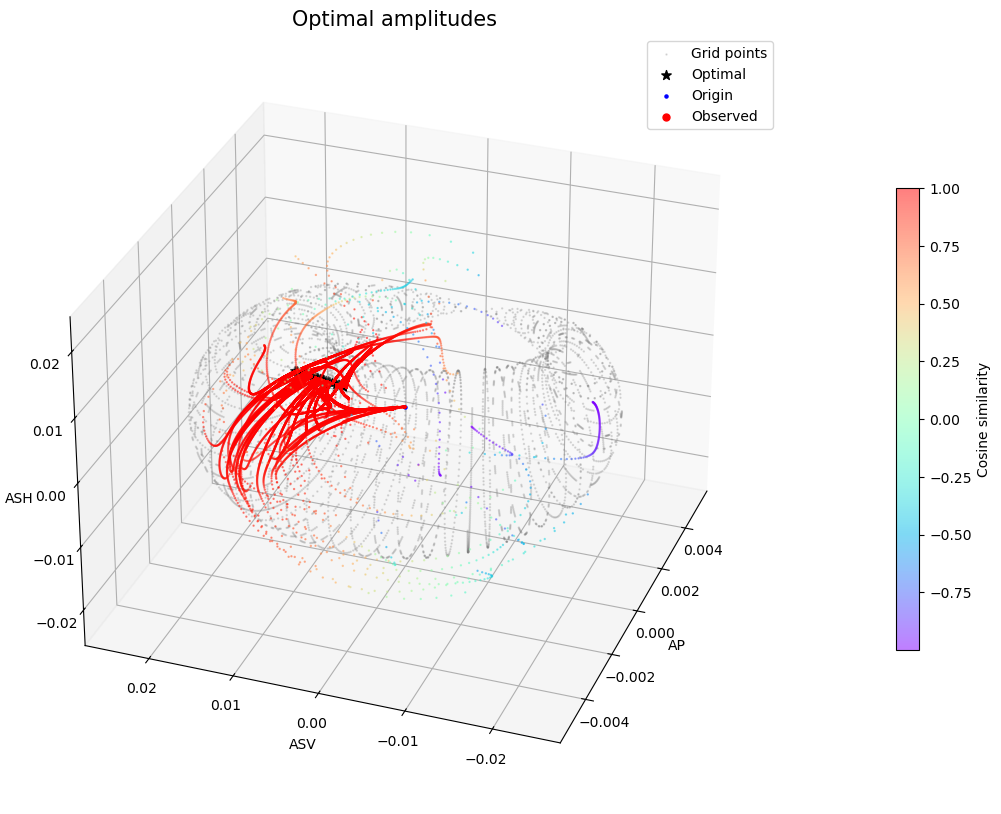

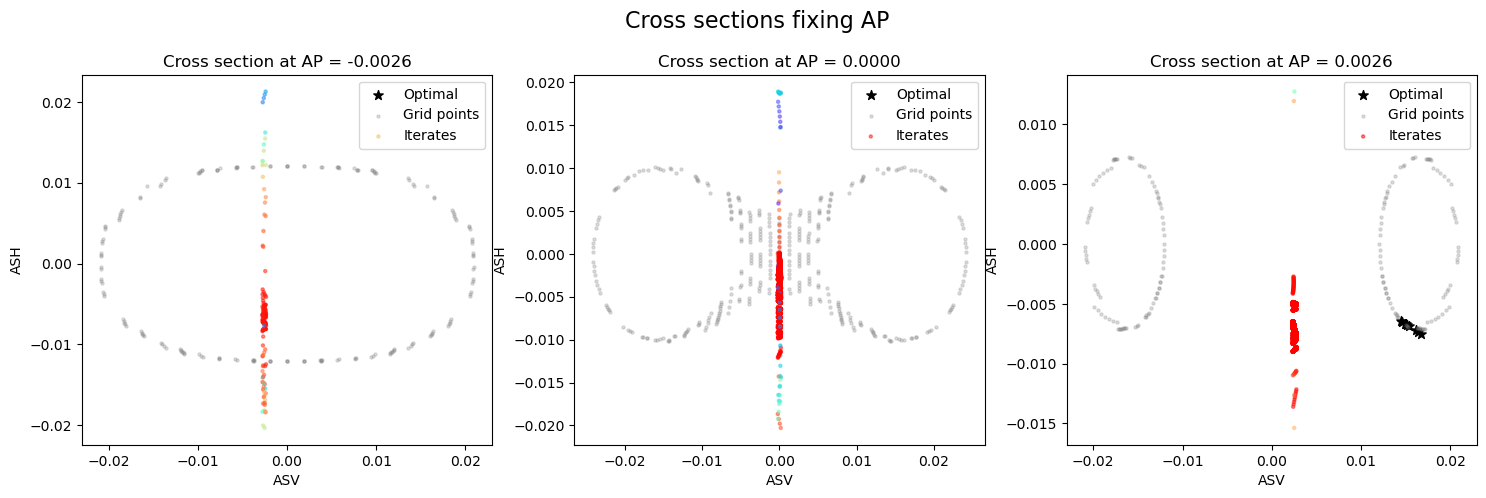

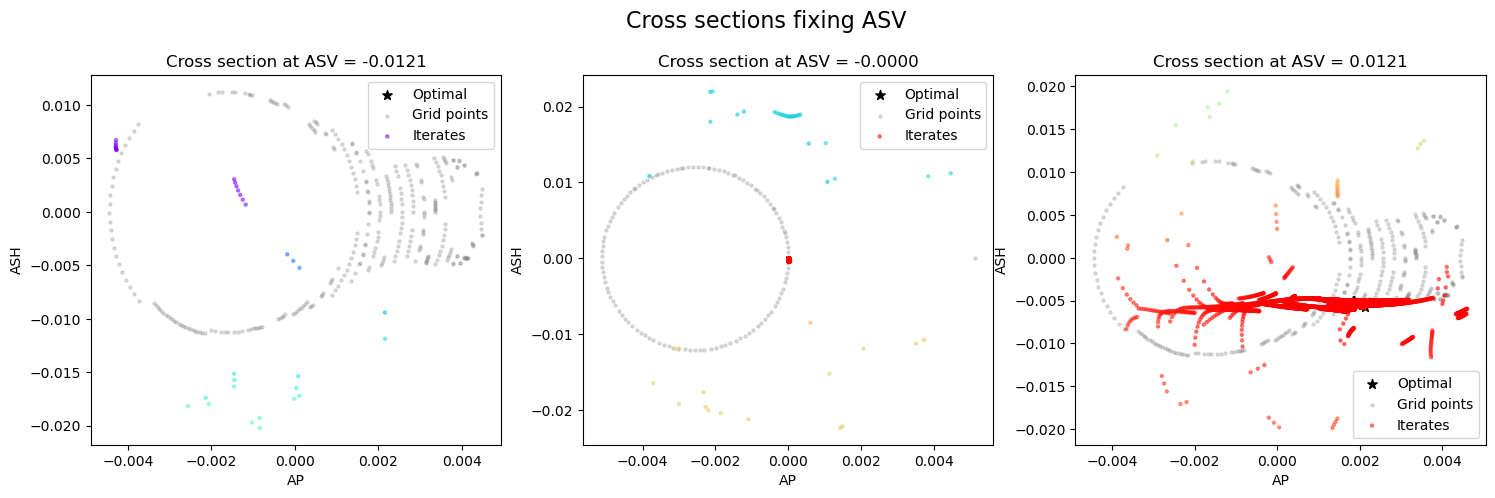

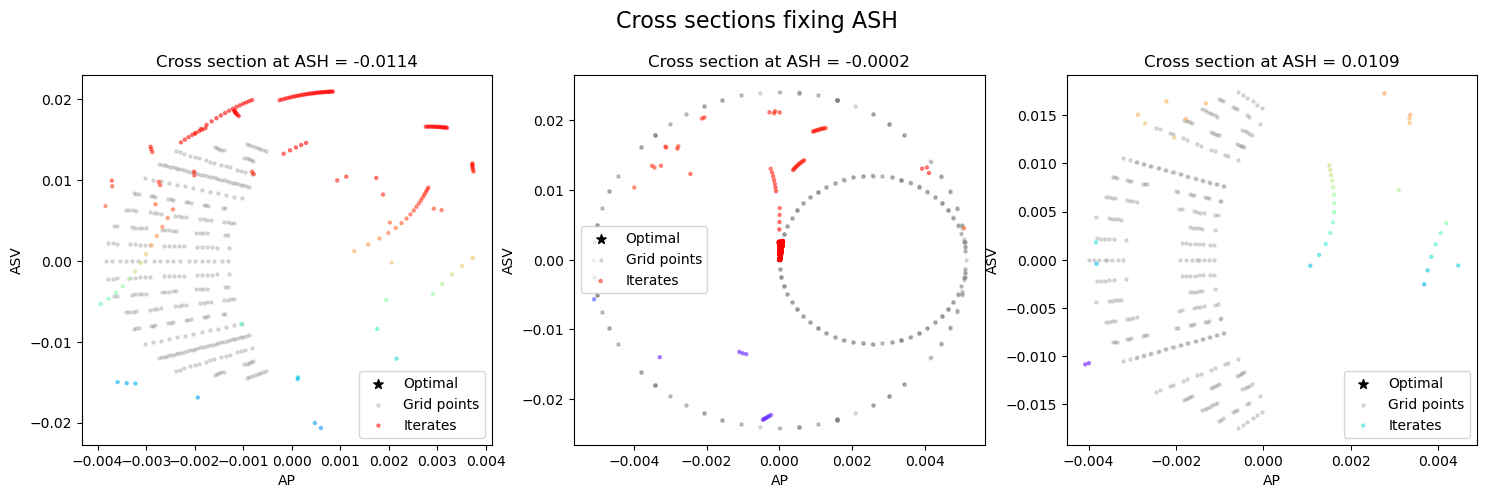

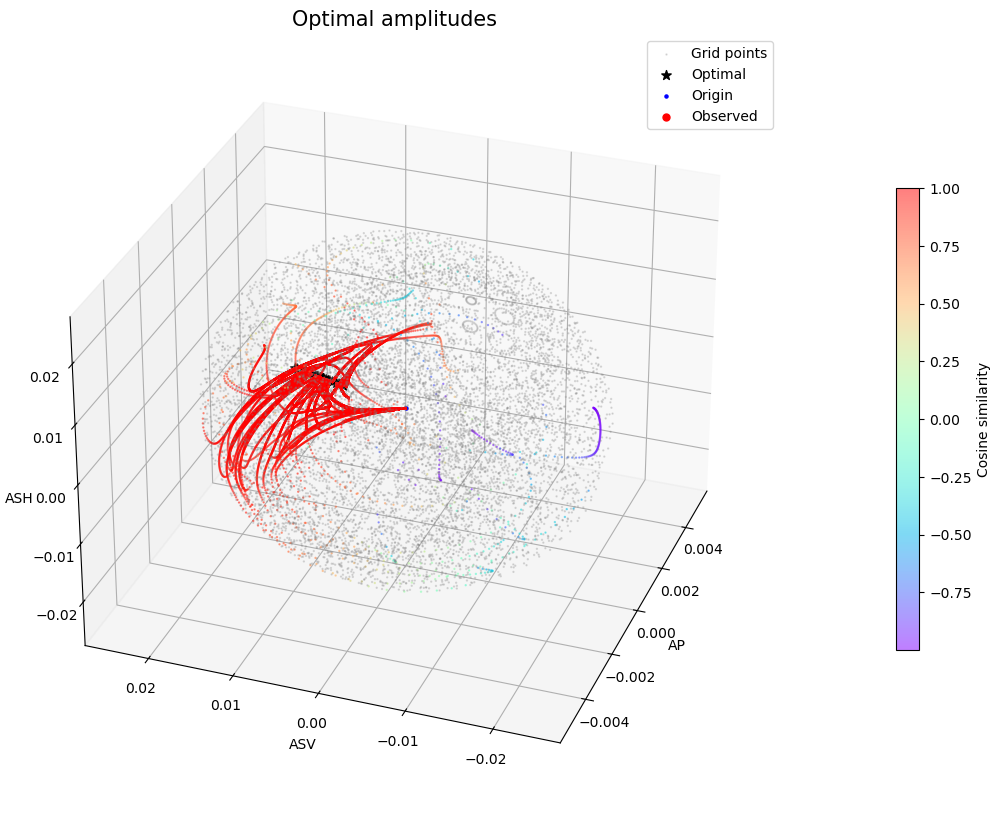

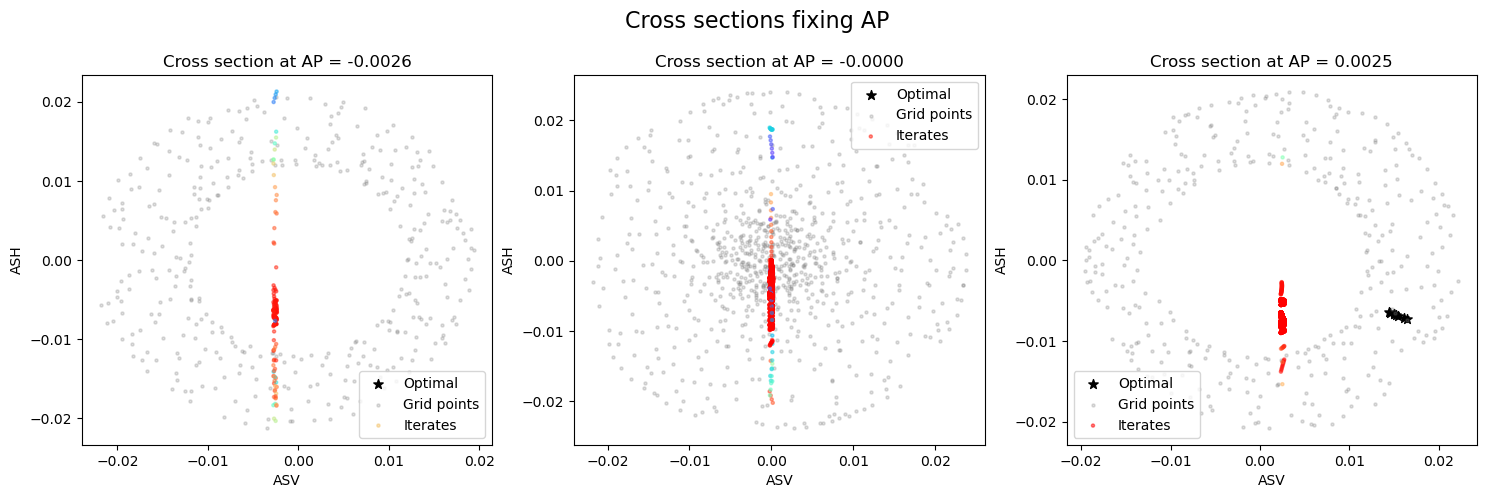

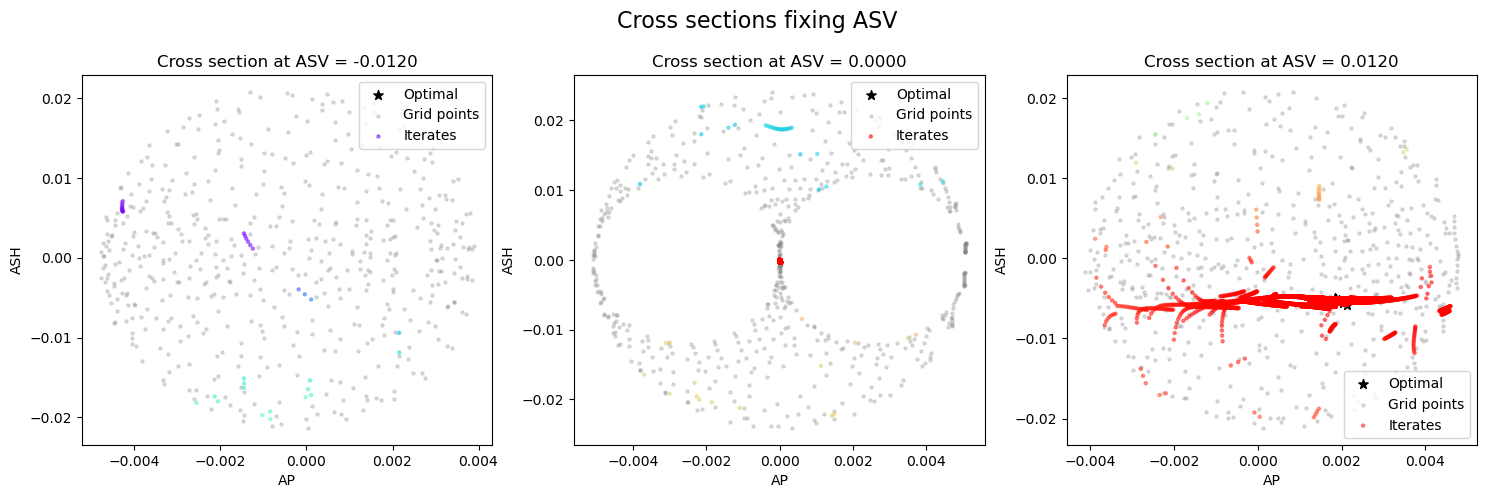

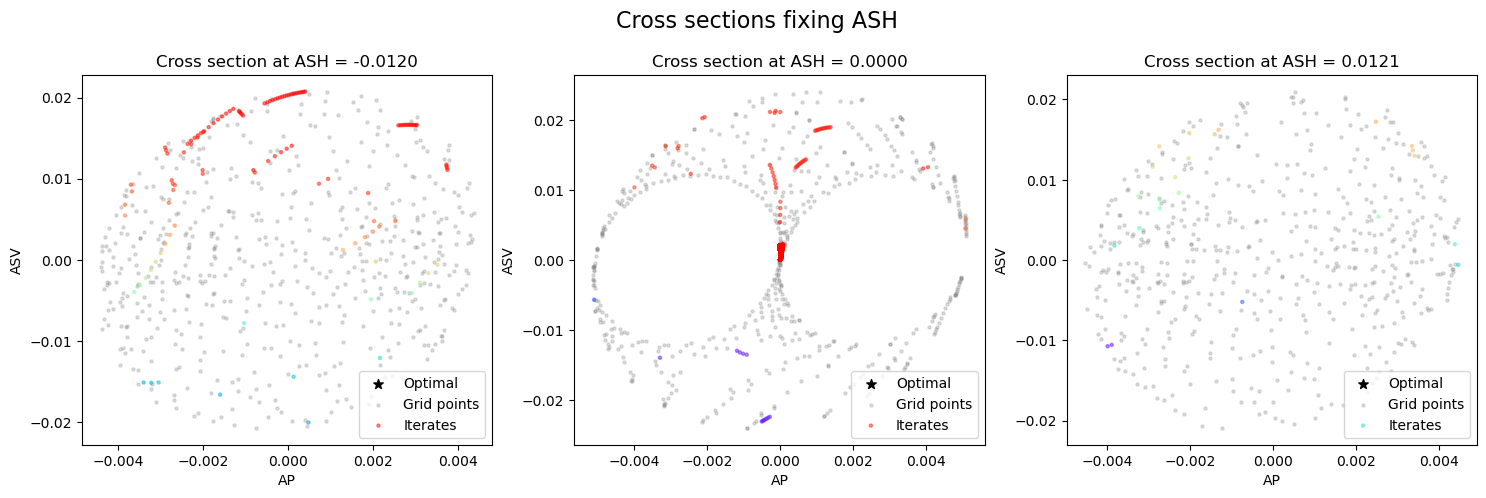

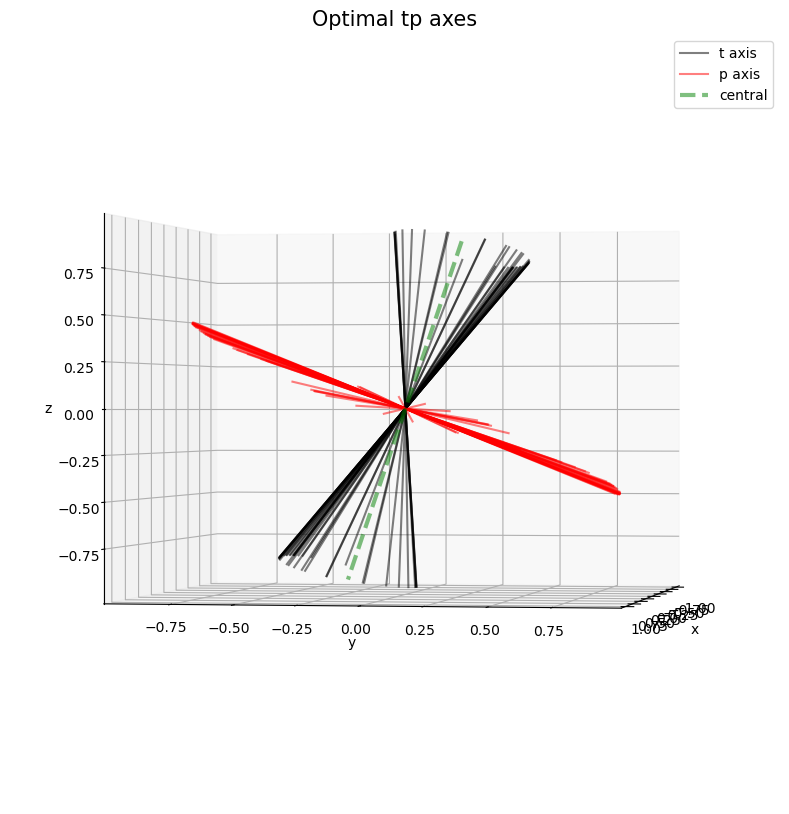

In [3]:
seed = 2025
np.random.seed(seed)
print(f'Seed: {seed}')

t, p = fn.k_hat, fn.i_hat

# get true params for synthetic test
true_params = fn.tp2sdr(t, p, True)[0]
print('Original params: ', true_params)

# plot corresponding beachball
beachball = fn.beachball(true_params)

# set up parameters for inversion
model = TauPyModel(model='ak135')  # velocity model
# model = TauPyModel(model='iasp...')
hdepth = 15  # km - assumed quake depth
epdist = 10  # degrees - epicentral distance
azimuth = 200  # degrees - azimuth of seismometer
p_arrivals = model.get_travel_times(source_depth_in_km=hdepth,
                        distance_in_degree=epdist, phase_list=['P'])
s_arrivals = model.get_travel_times(source_depth_in_km=hdepth,
                        distance_in_degree=epdist, phase_list=['S'])
takeoff_angles = [p_arrivals[0].takeoff_angle, s_arrivals[0].takeoff_angle]

# for other depths, extract velocities from lookup table
velocities = np.array([5.8000, 3.4600])

# initialize model
radiation_model = rm.RadiationModel(np.deg2rad(azimuth),
                                    takeoff_angles, velocities)

model_Ao = radiation_model(np.deg2rad(true_params), set_Ao=True,
                           return_A=True)

# tune hyperparameters
config = opt.get_config()

# multistart optimization
num_starts = 50
starts = fn.random_params(num_starts)

radiation_model.reset()
print_every = 10

for index, start in enumerate(starts):
    if print_every > 0 and index % print_every == 0:
        print(f'Run {index} of {num_starts}')
    opt.minimize(radiation_model, config, start)
    
print(f'Convergence rate: {radiation_model.get_convergence_rate():.0f}%')

# the dense parameterization in one space
params, error, position = radiation_model.get_optimal_parameters(z_threshold=2)
name = 'T' if position == 0 else 'P'

print(f'Constrained axis: {name}')
print(f'Optimal parameters: {np.rad2deg(params)}')
print(f'Search error: {np.rad2deg(error)} degrees')

# plots.half_angles(radiation_model, bins=10)

# best-fitting mechanisms
plots.beachballs(radiation_model, central=False, order_by='strike')

# fix parameters (mechanism), vary hyperparameters (station location)
radiation_model.reset_grid_amplitudes()
radiation_model.set_grid_amplitudes(3, random=False, fix_params=True)
plots.amplitudes(radiation_model, azim=200, elev=30, s=50, alpha=0.5,
                 iterates=True, grid=True, cross_section=[3,3,3],
                 eps_factor=2e-2, optimal=True, observed=True)

# fix hyperparameters (station location), vary parameters (mechanism)
radiation_model.reset_grid_amplitudes()
radiation_model.set_grid_amplitudes(7, random=False, fix_params=False)
plots.amplitudes(radiation_model, azim=200, elev=30, s=50, alpha=0.5,
                 iterates=True, grid=True, cross_section=[3,3,3],
                 eps_factor=2e-2, optimal=True, observed=True)

# tp axes, enz coordinates not yet implemented
plots.tp_axes(radiation_model, azim=10, elev=00, half=False, central=False)

#### Normal

Seed: 2025
Original params:  [  0.  45. -90.]


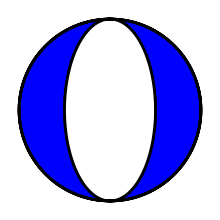

Run 0 of 50
Run 10 of 50
Run 20 of 50
Run 30 of 50
Run 40 of 50
Convergence rate: 70%
Constrained axis: P
Optimal parameters: [138.88972045  18.50540589  17.1925189 ]
Search error: 0.8947822453899528 degrees


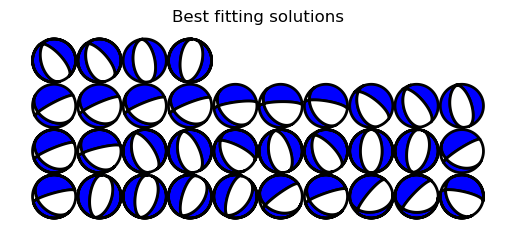

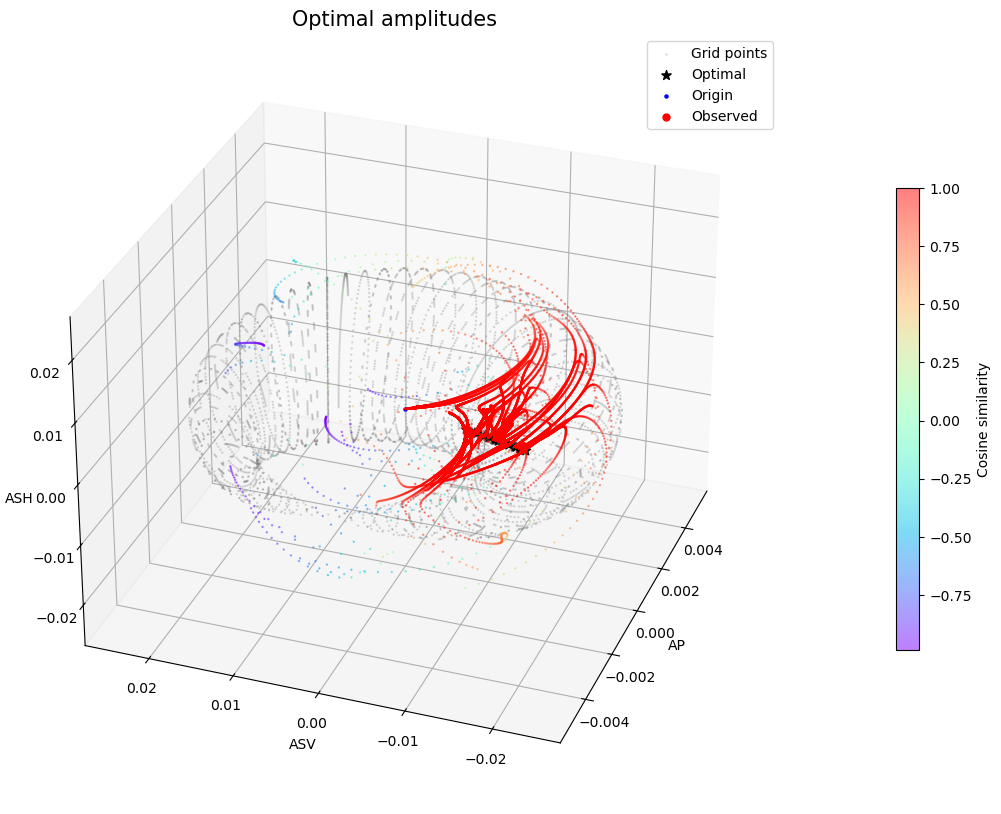

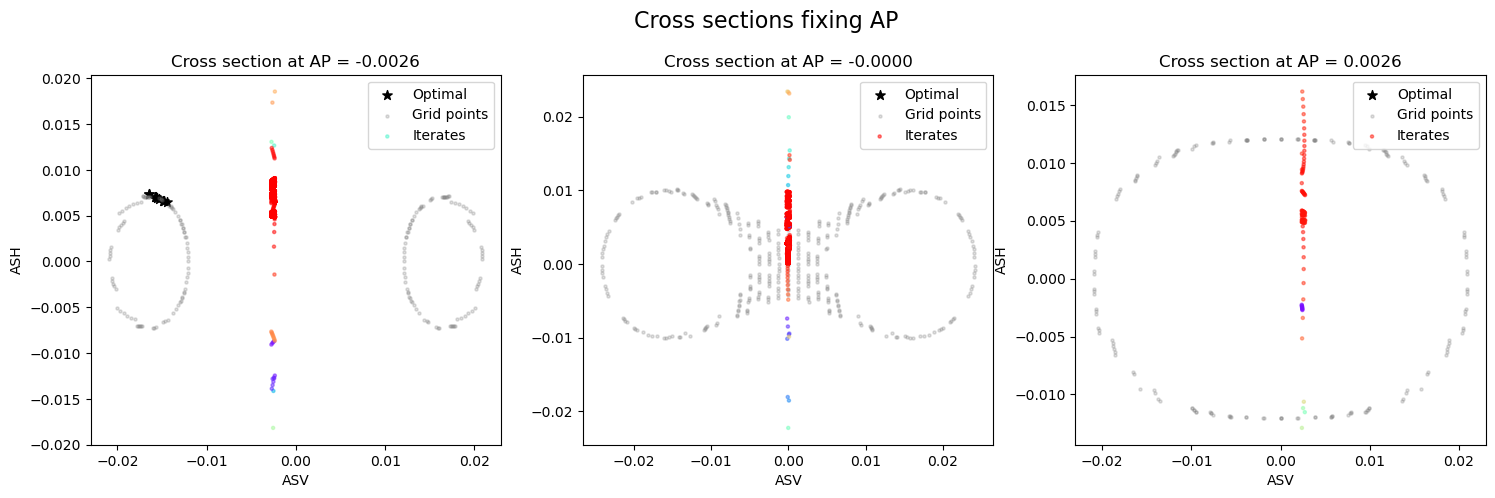

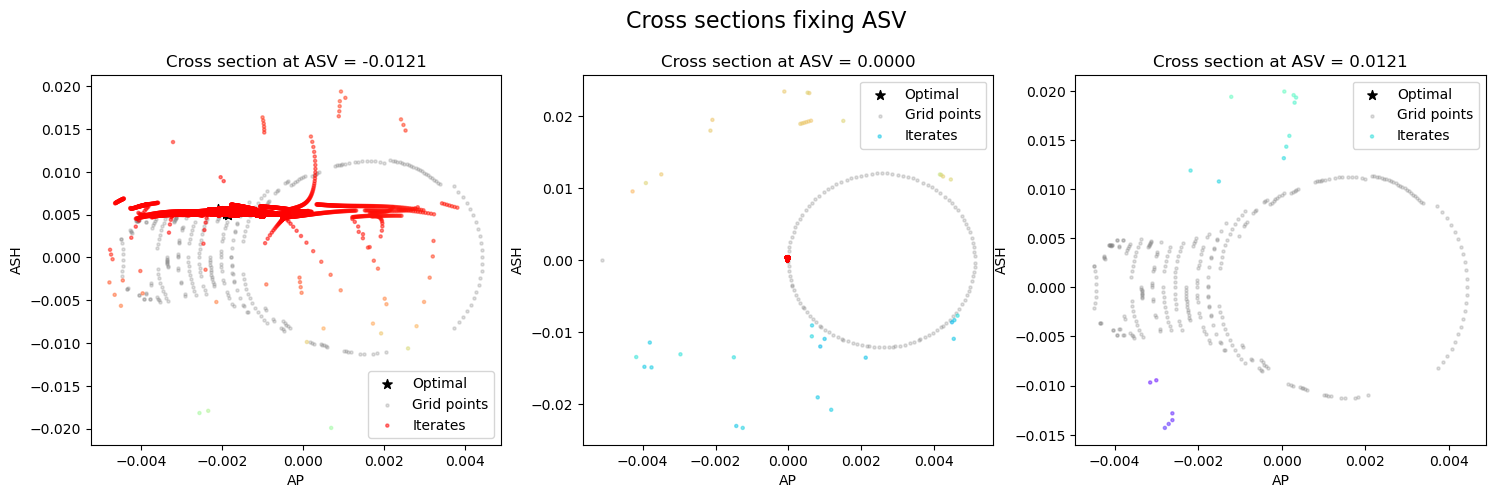

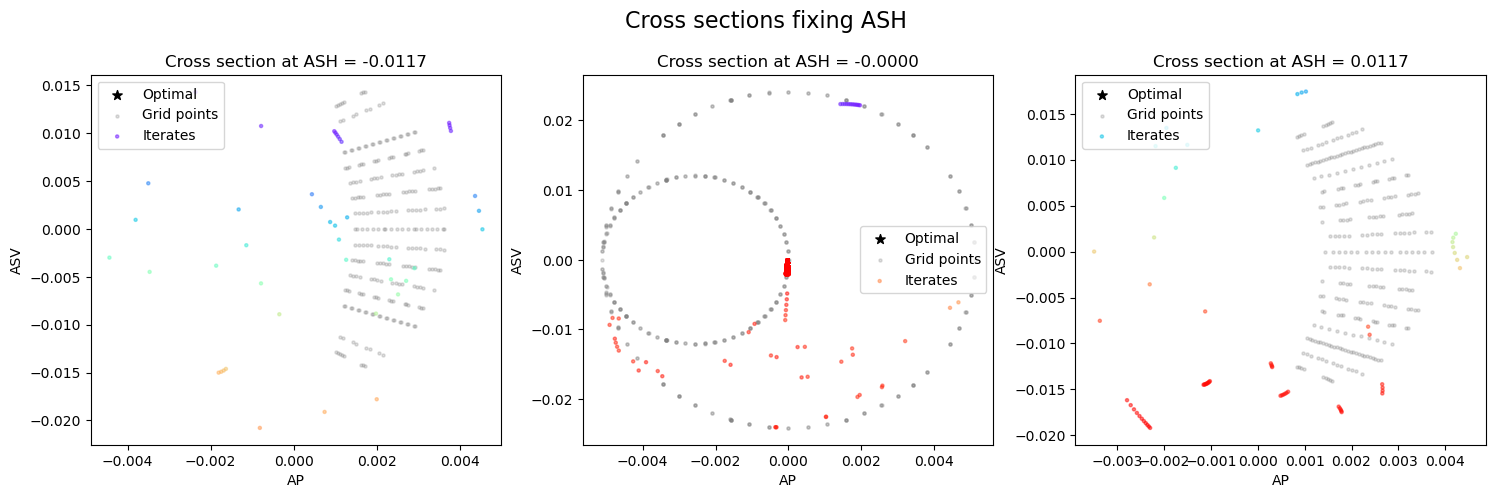

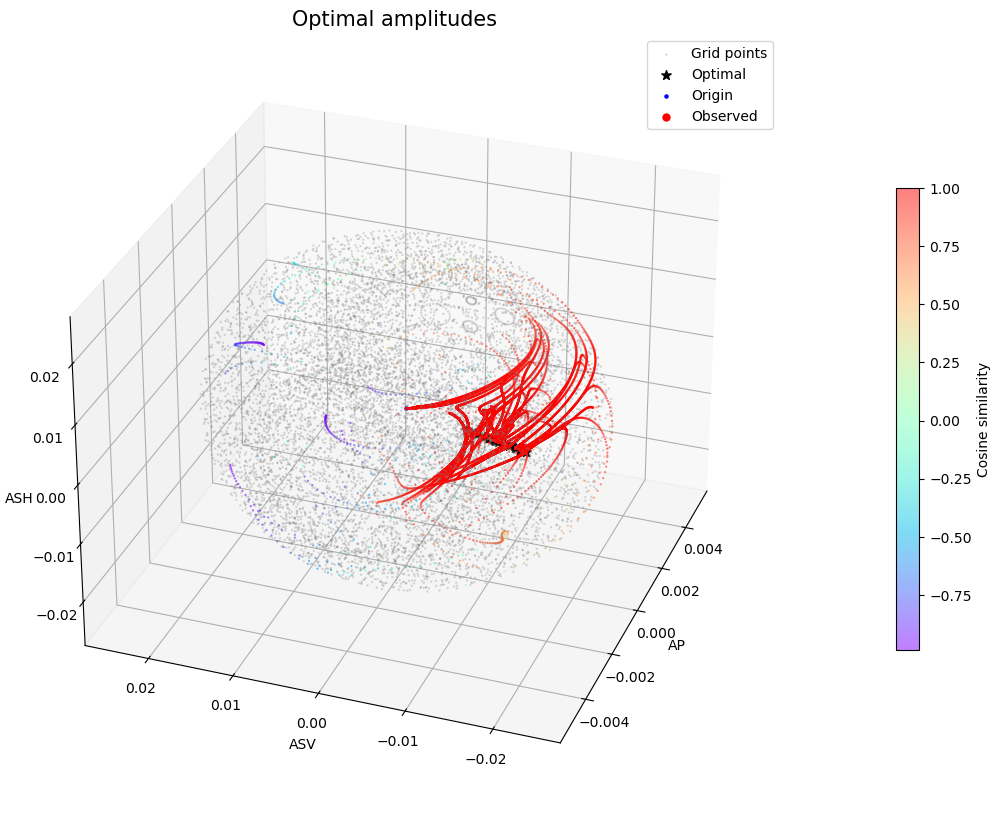

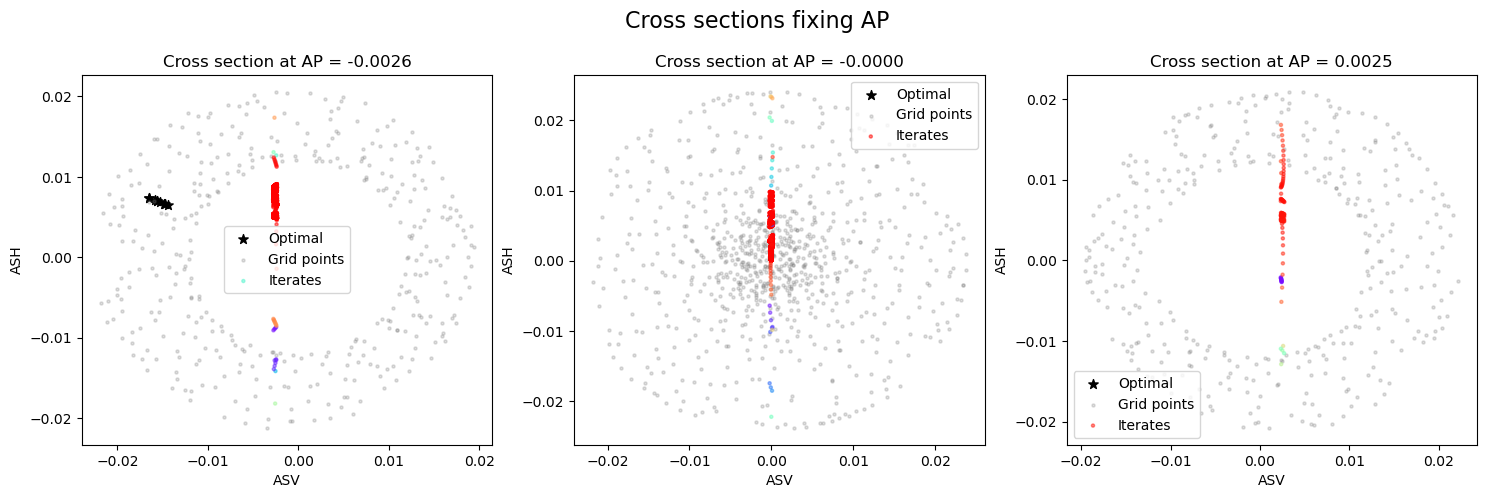

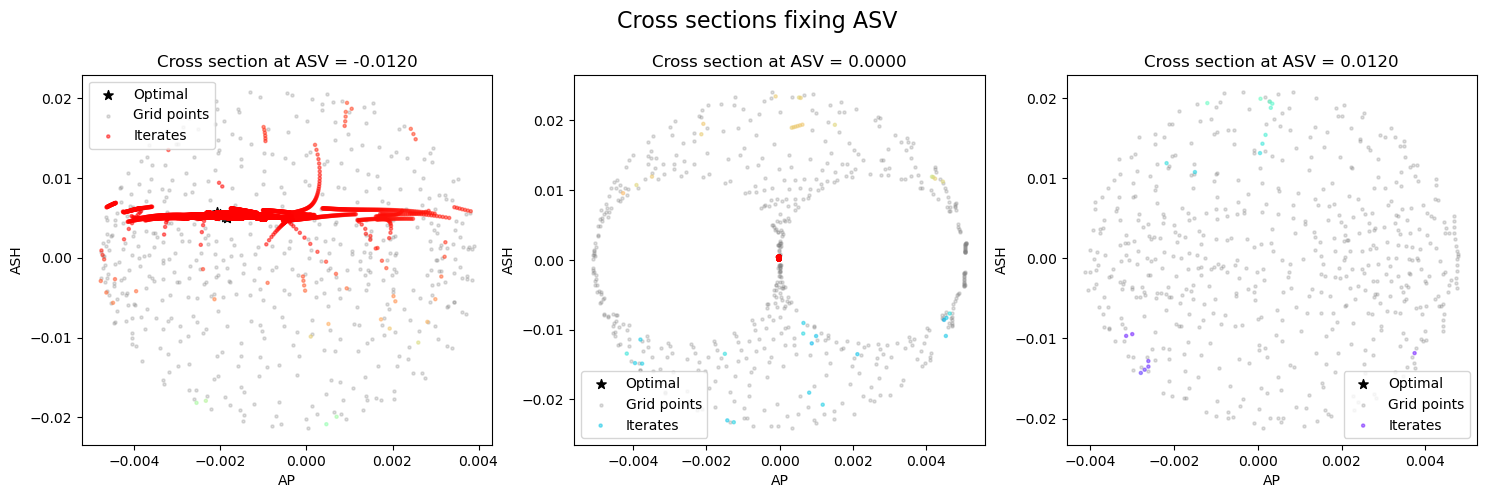

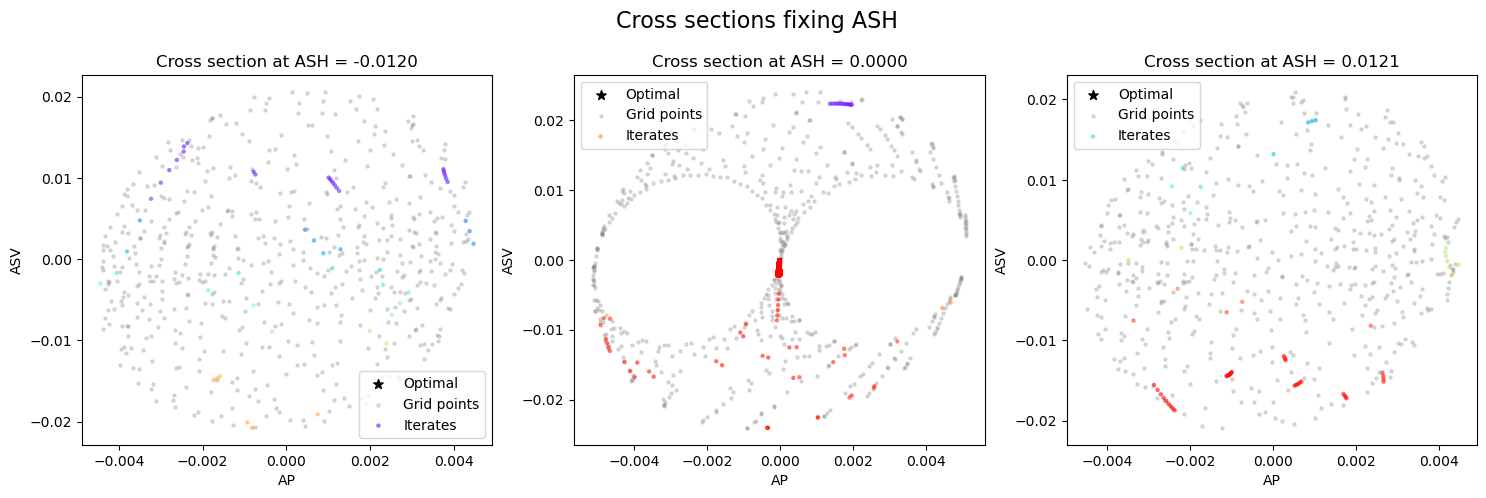

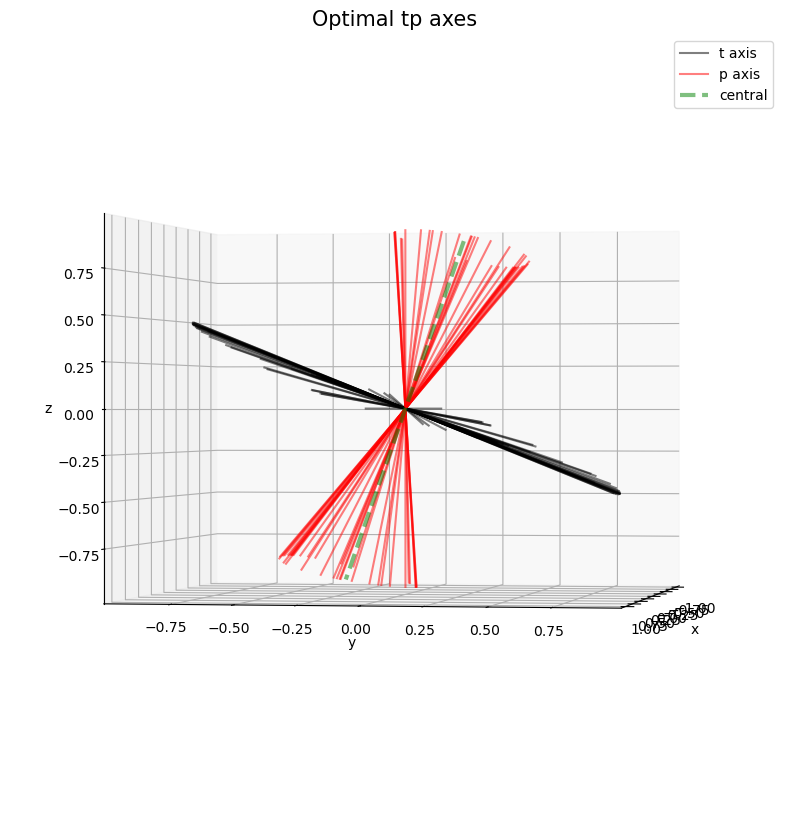

In [4]:
seed = 2025
np.random.seed(seed)
print(f'Seed: {seed}')

t, p = fn.i_hat, fn.k_hat

# get true params for synthetic test
true_params = fn.tp2sdr(t, p, True)[0]
print('Original params: ', true_params)

# plot corresponding beachball
beachball = fn.beachball(true_params)

# set up parameters for inversion
model = TauPyModel(model='ak135')  # velocity model
# model = TauPyModel(model='iasp...')
hdepth = 15  # km - assumed quake depth
epdist = 10  # degrees - epicentral distance
azimuth = 200  # degrees - azimuth of seismometer
p_arrivals = model.get_travel_times(source_depth_in_km=hdepth,
                        distance_in_degree=epdist, phase_list=['P'])
s_arrivals = model.get_travel_times(source_depth_in_km=hdepth,
                        distance_in_degree=epdist, phase_list=['S'])
takeoff_angles = [p_arrivals[0].takeoff_angle, s_arrivals[0].takeoff_angle]

# for other depths, extract velocities from lookup table
velocities = np.array([5.8000, 3.4600])

# initialize model
radiation_model = rm.RadiationModel(np.deg2rad(azimuth),
                                    takeoff_angles, velocities)

model_Ao = radiation_model(np.deg2rad(true_params), set_Ao=True,
                           return_A=True)

# tune hyperparameters
config = opt.get_config()

# multistart optimization
num_starts = 50
starts = fn.random_params(num_starts)

radiation_model.reset()
print_every = 10

for index, start in enumerate(starts):
    if print_every > 0 and index % print_every == 0:
        print(f'Run {index} of {num_starts}')
    opt.minimize(radiation_model, config, start)
    
print(f'Convergence rate: {radiation_model.get_convergence_rate():.0f}%')

# the dense parameterization in one space
params, error, position = radiation_model.get_optimal_parameters(z_threshold=2)
name = 'T' if position == 0 else 'P'

print(f'Constrained axis: {name}')
print(f'Optimal parameters: {np.rad2deg(params)}')
print(f'Search error: {np.rad2deg(error)} degrees')

# plots.half_angles(radiation_model, bins=10)

# best-fitting mechanisms
plots.beachballs(radiation_model, central=False, order_by='strike')

# fix parameters (mechanism), vary hyperparameters (station location)
radiation_model.reset_grid_amplitudes()
radiation_model.set_grid_amplitudes(3, random=False, fix_params=True)
plots.amplitudes(radiation_model, azim=200, elev=30, s=50, alpha=0.5,
                 iterates=True, grid=True, cross_section=[3,3,3],
                 eps_factor=2e-2, optimal=True, observed=True)

# fix hyperparameters (station location), vary parameters (mechanism)
radiation_model.reset_grid_amplitudes()
radiation_model.set_grid_amplitudes(7, random=False, fix_params=False)
plots.amplitudes(radiation_model, azim=200, elev=30, s=50, alpha=0.5,
                 iterates=True, grid=True, cross_section=[3,3,3],
                 eps_factor=2e-2, optimal=True, observed=True)

# tp axes, enz coordinates not yet implemented
plots.tp_axes(radiation_model, azim=10, elev=00, half=False, central=False)

#### Strike-slip

Seed: 2025
Original params:  [270.  90. 180.]


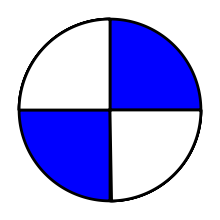

Run 0 of 50
Run 10 of 50
Run 20 of 50
Run 30 of 50
Run 40 of 50
Convergence rate: 98%
Constrained axis: T
Optimal parameters: [30.53065816 78.57691637 17.20161479]
Search error: 1.117772251315321 degrees


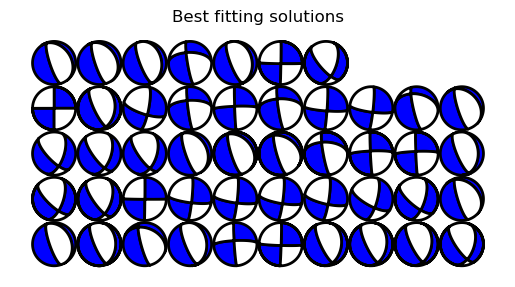

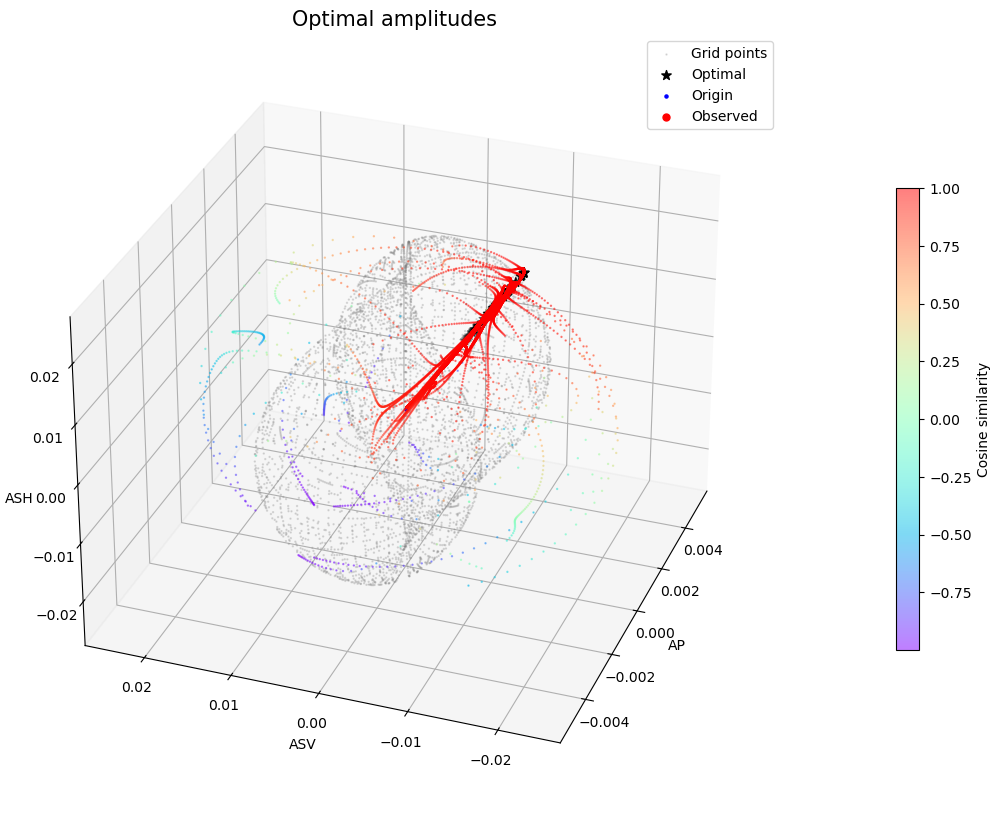

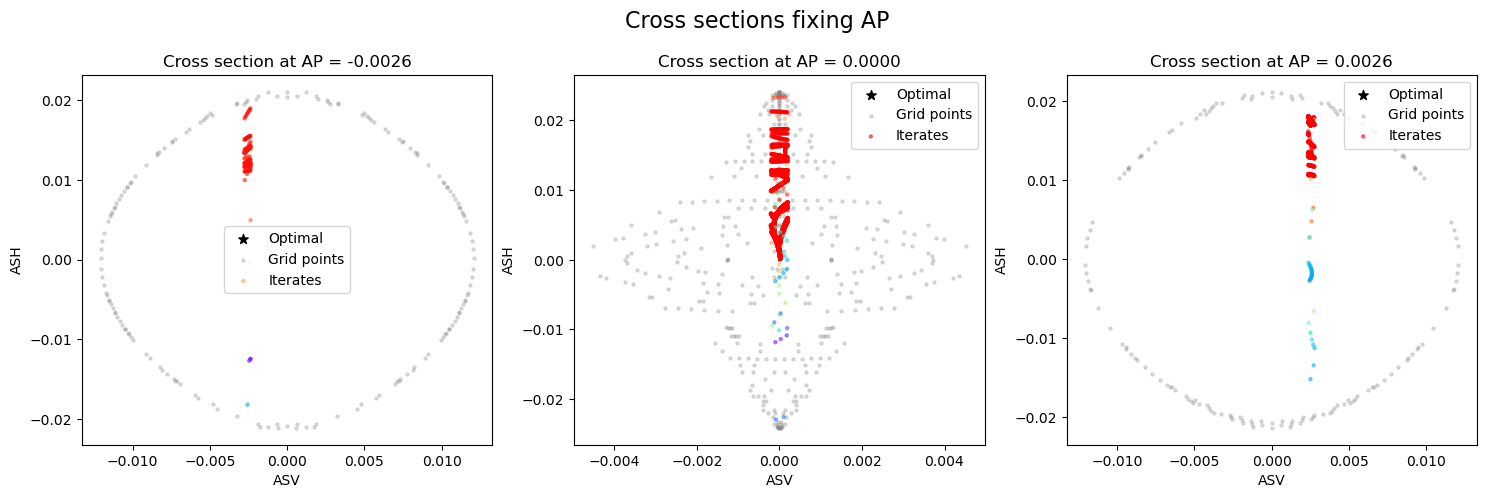

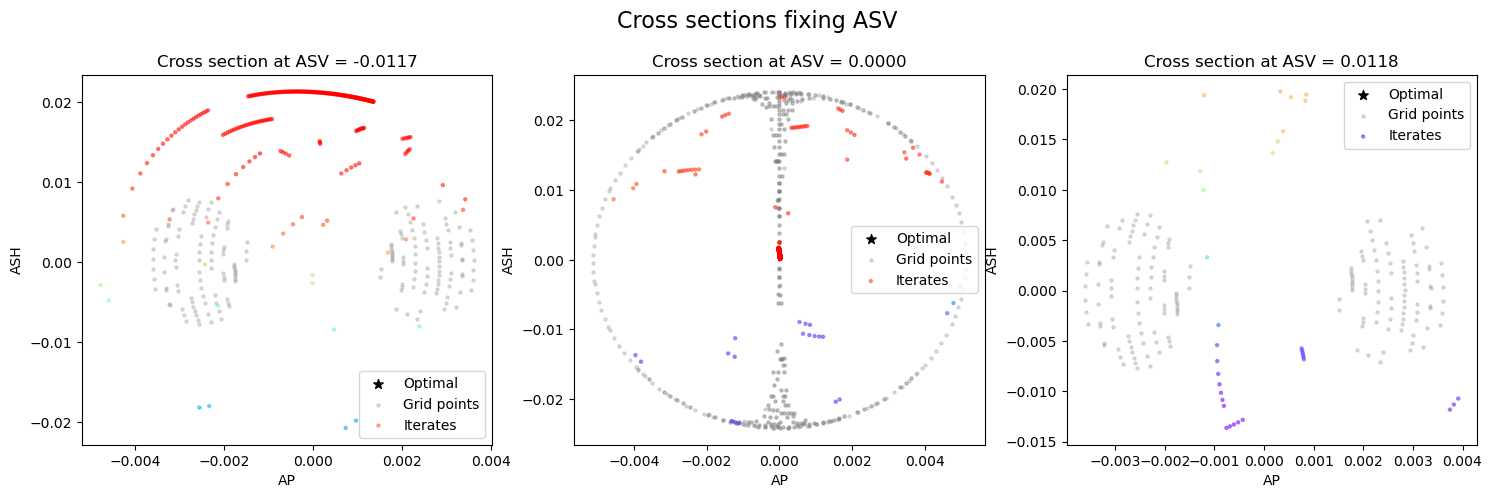

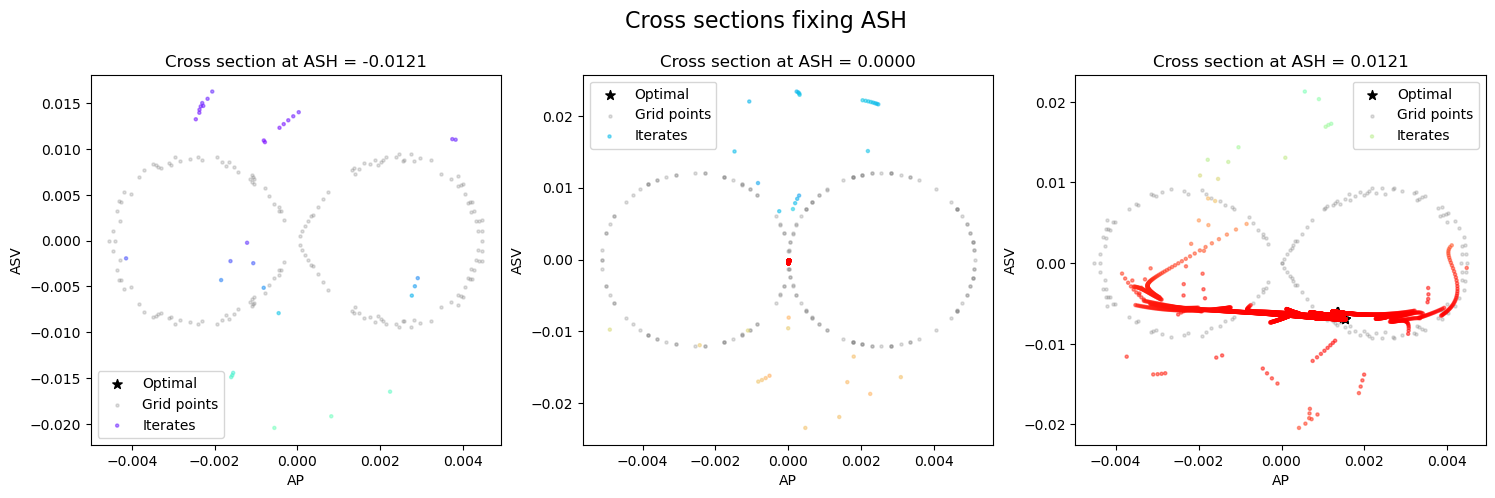

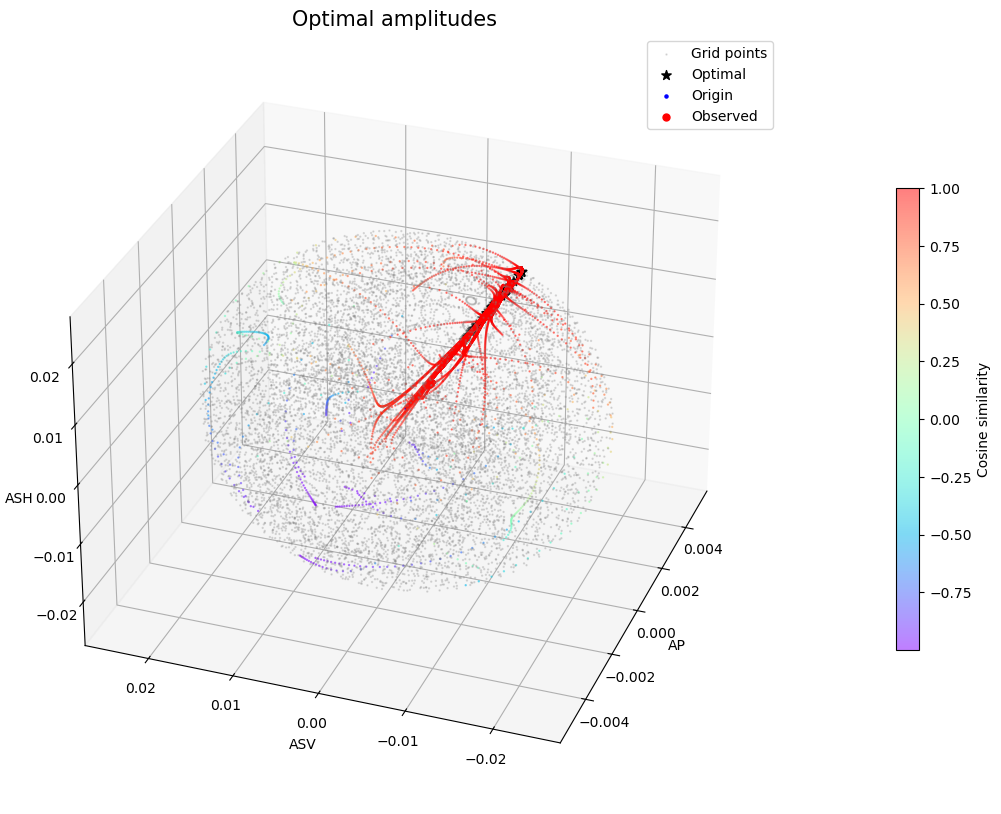

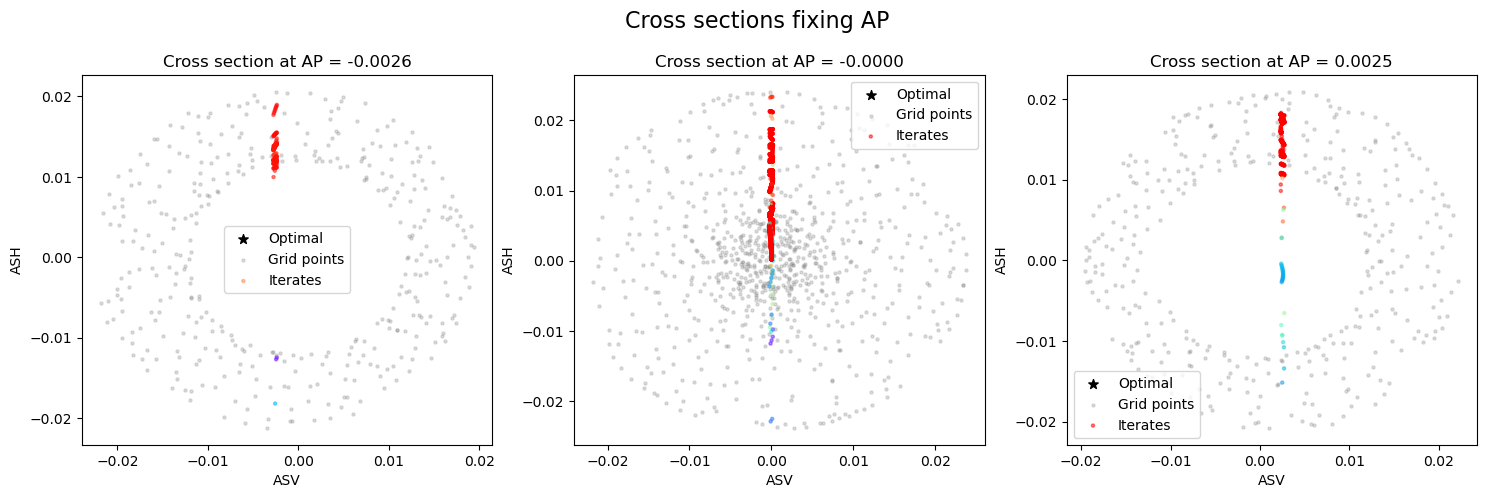

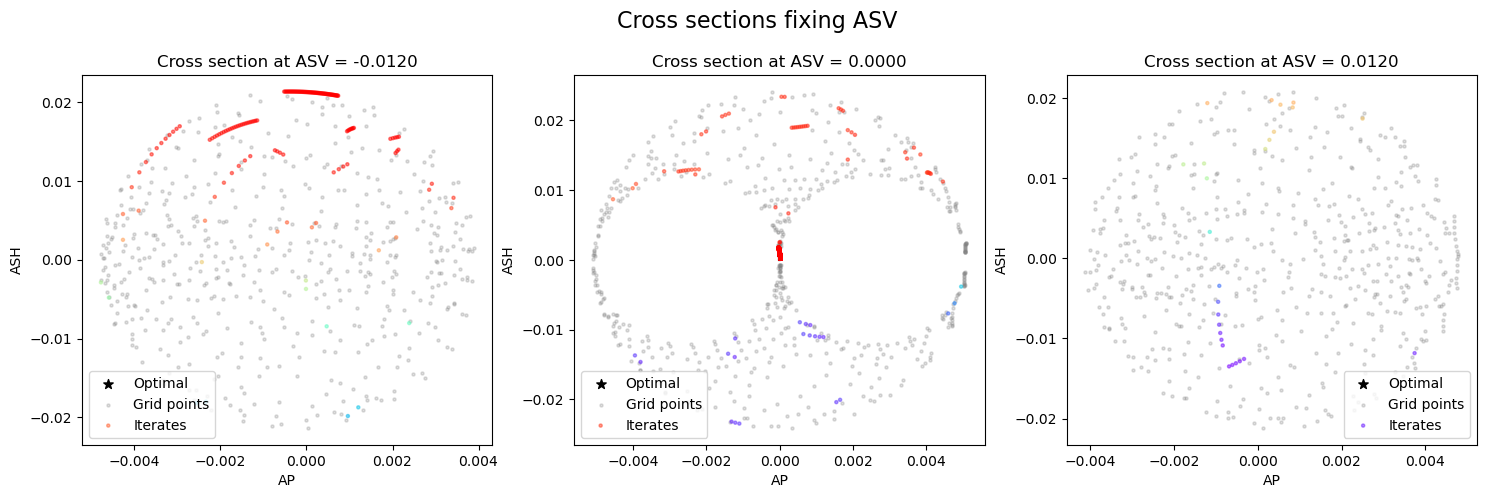

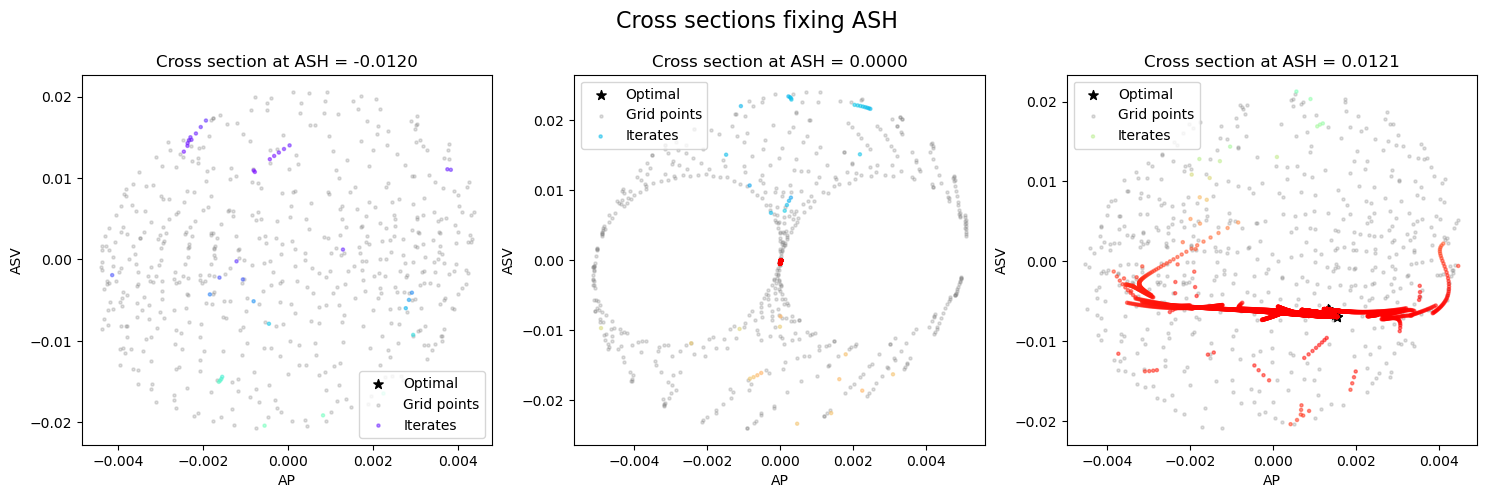

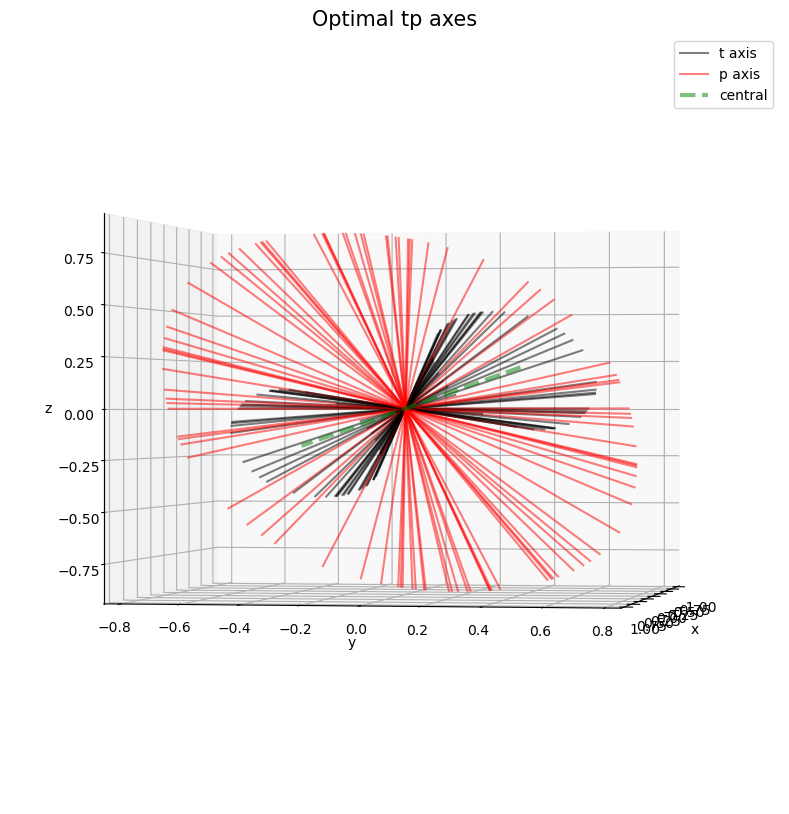

In [5]:
seed = 2025
np.random.seed(seed)
print(f'Seed: {seed}')

t, p = fn.unit_vec(fn.i_hat + fn.j_hat), \
    fn.unit_vec(fn.j_hat - fn.i_hat)

# get true params for synthetic test
true_params = fn.tp2sdr(t, p, True)[0]
print('Original params: ', true_params)

# plot corresponding beachball
beachball = fn.beachball(true_params)

# set up parameters for inversion
model = TauPyModel(model='ak135')  # velocity model
# model = TauPyModel(model='iasp...')
hdepth = 15  # km - assumed quake depth
epdist = 10  # degrees - epicentral distance
azimuth = 200  # degrees - azimuth of seismometer
p_arrivals = model.get_travel_times(source_depth_in_km=hdepth,
                        distance_in_degree=epdist, phase_list=['P'])
s_arrivals = model.get_travel_times(source_depth_in_km=hdepth,
                        distance_in_degree=epdist, phase_list=['S'])
takeoff_angles = [p_arrivals[0].takeoff_angle, s_arrivals[0].takeoff_angle]

# for other depths, extract velocities from lookup table
velocities = np.array([5.8000, 3.4600])

# initialize model
radiation_model = rm.RadiationModel(np.deg2rad(azimuth),
                                    takeoff_angles, velocities)

model_Ao = radiation_model(np.deg2rad(true_params), set_Ao=True,
                           return_A=True)

# tune hyperparameters
config = opt.get_config()

# multistart optimization
num_starts = 50
starts = fn.random_params(num_starts)

radiation_model.reset()
print_every = 10

for index, start in enumerate(starts):
    if print_every > 0 and index % print_every == 0:
        print(f'Run {index} of {num_starts}')
    opt.minimize(radiation_model, config, start)
    
print(f'Convergence rate: {radiation_model.get_convergence_rate():.0f}%')

# the dense parameterization in one space
params, error, position = radiation_model.get_optimal_parameters(z_threshold=2)
name = 'T' if position == 0 else 'P'

print(f'Constrained axis: {name}')
print(f'Optimal parameters: {np.rad2deg(params)}')
print(f'Search error: {np.rad2deg(error)} degrees')

# plots.half_angles(radiation_model, bins=10)

# best-fitting mechanisms
plots.beachballs(radiation_model, central=False, order_by='strike')

# fix parameters (mechanism), vary hyperparameters (station location)
radiation_model.reset_grid_amplitudes()
radiation_model.set_grid_amplitudes(3, random=False, fix_params=True)
plots.amplitudes(radiation_model, azim=200, elev=30, s=50, alpha=0.5,
                 iterates=True, grid=True, cross_section=[3,3,3],
                 eps_factor=2e-2, optimal=True, observed=True)

# fix hyperparameters (station location), vary parameters (mechanism)
radiation_model.reset_grid_amplitudes()
radiation_model.set_grid_amplitudes(7, random=False, fix_params=False)
plots.amplitudes(radiation_model, azim=200, elev=30, s=50, alpha=0.5,
                 iterates=True, grid=True, cross_section=[3,3,3],
                 eps_factor=2e-2, optimal=True, observed=True)

# tp axes, enz coordinates not yet implemented
plots.tp_axes(radiation_model, azim=10, elev=00, half=False, central=False)

#### Rotated strike-slip

Seed: 2025
Original params:  [315.  90. 180.]


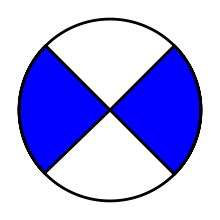

Run 0 of 50
Run 10 of 50
Run 20 of 50
Run 30 of 50
Run 40 of 50
Convergence rate: 96%
Constrained axis: P
Optimal parameters: [101.68891735  79.0297253   14.79062351]
Search error: 0.8282251363107972 degrees


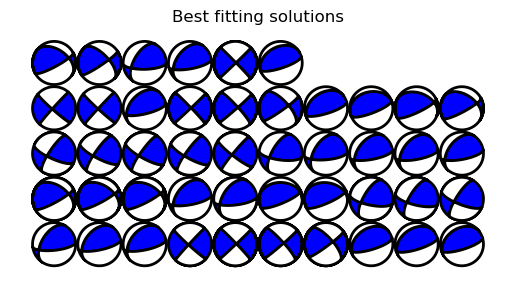

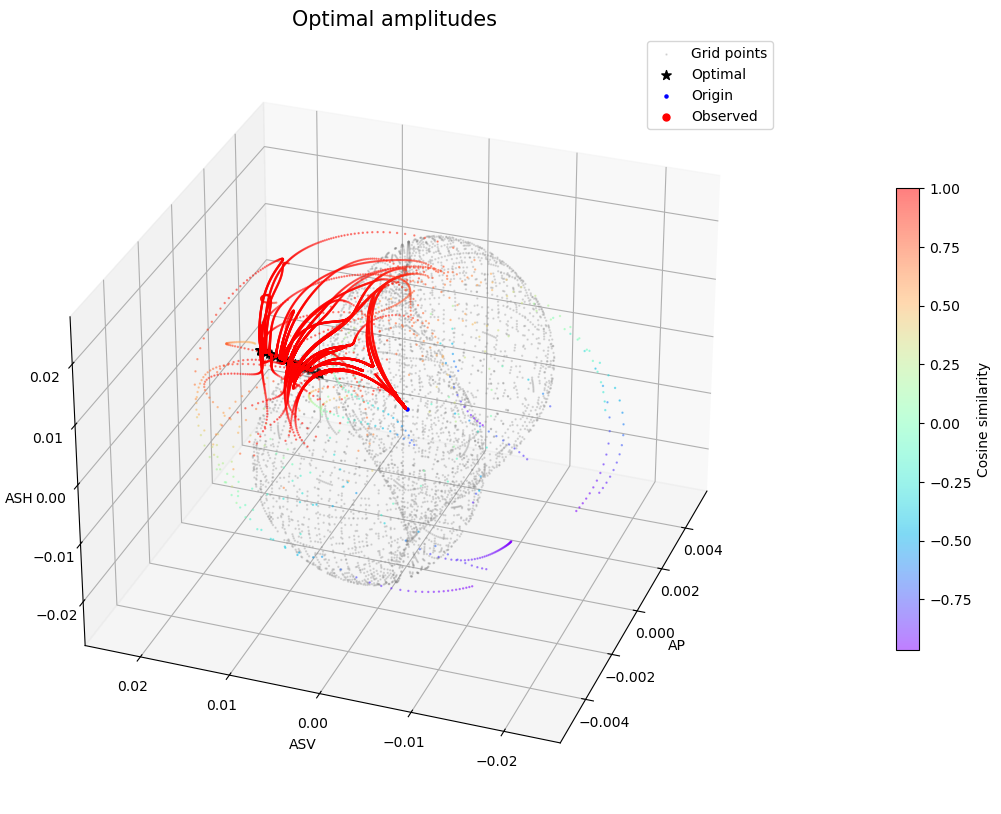

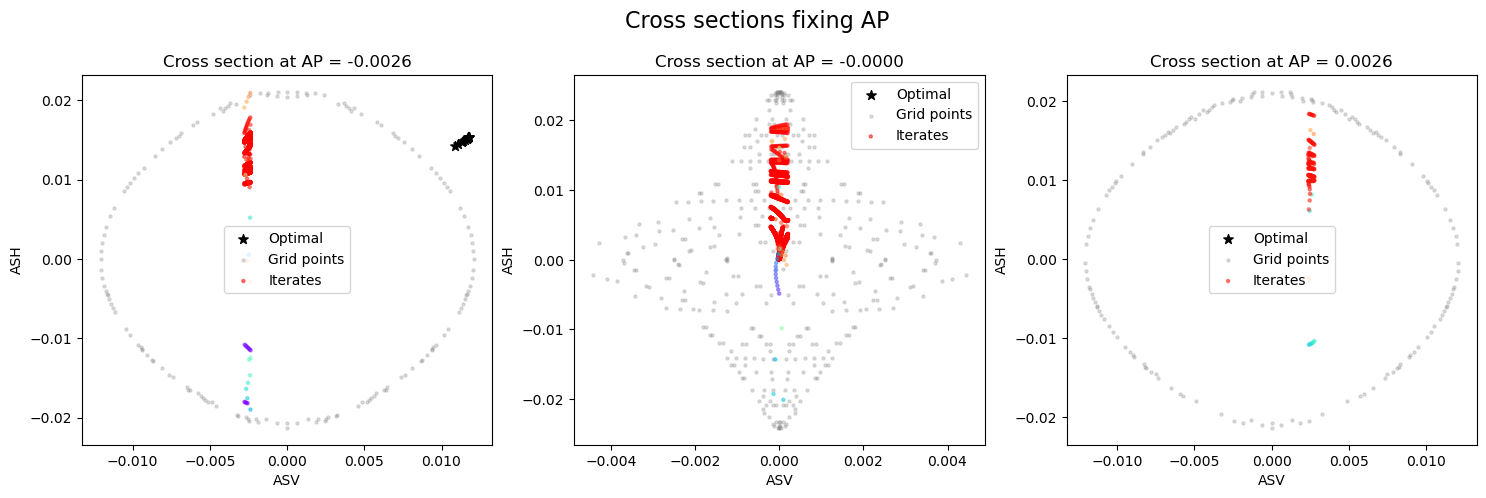

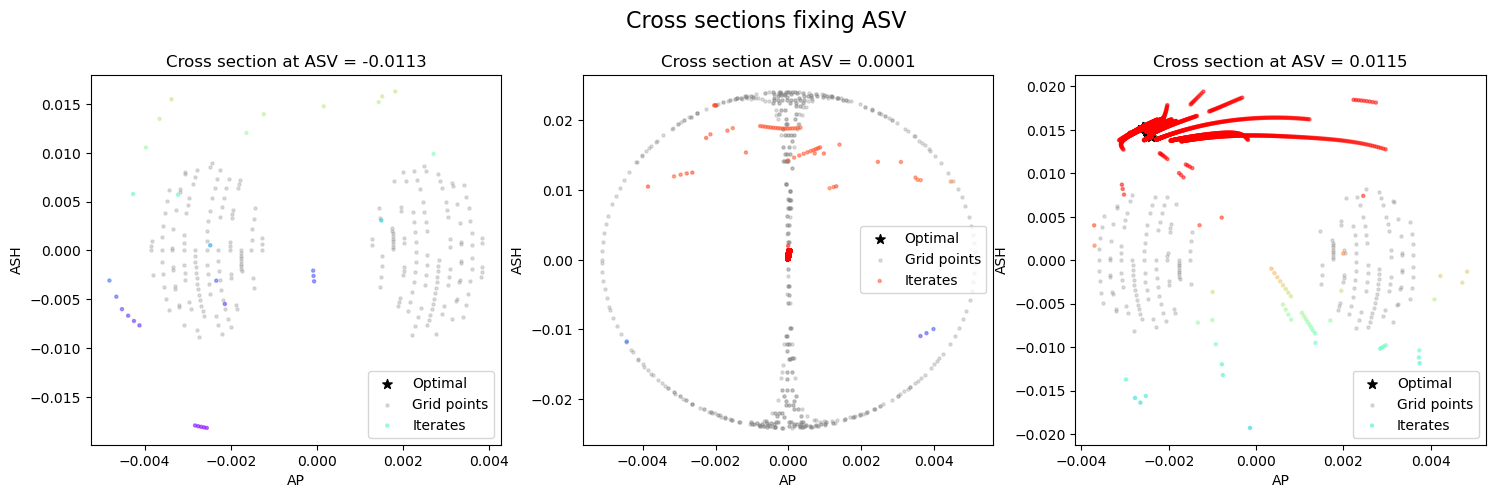

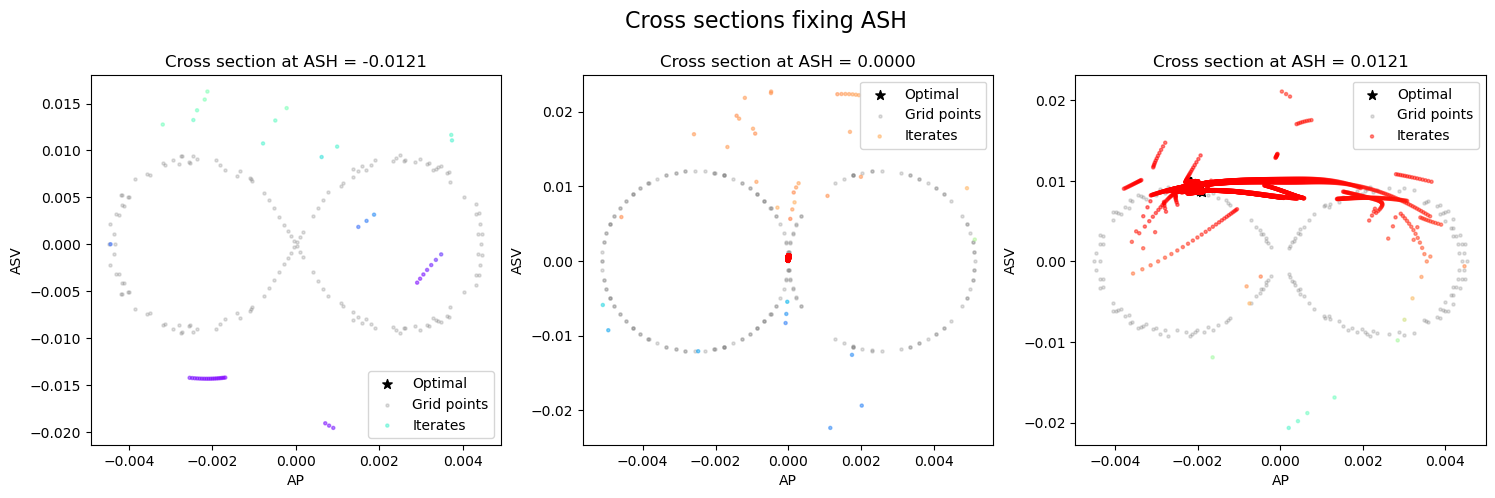

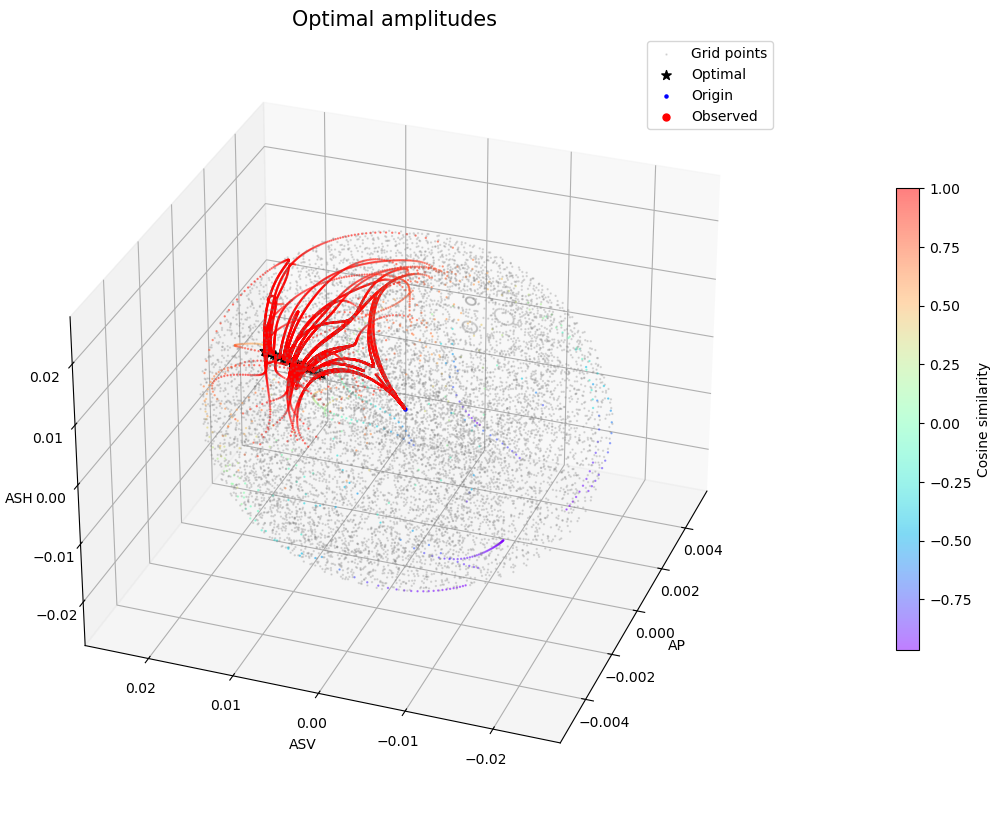

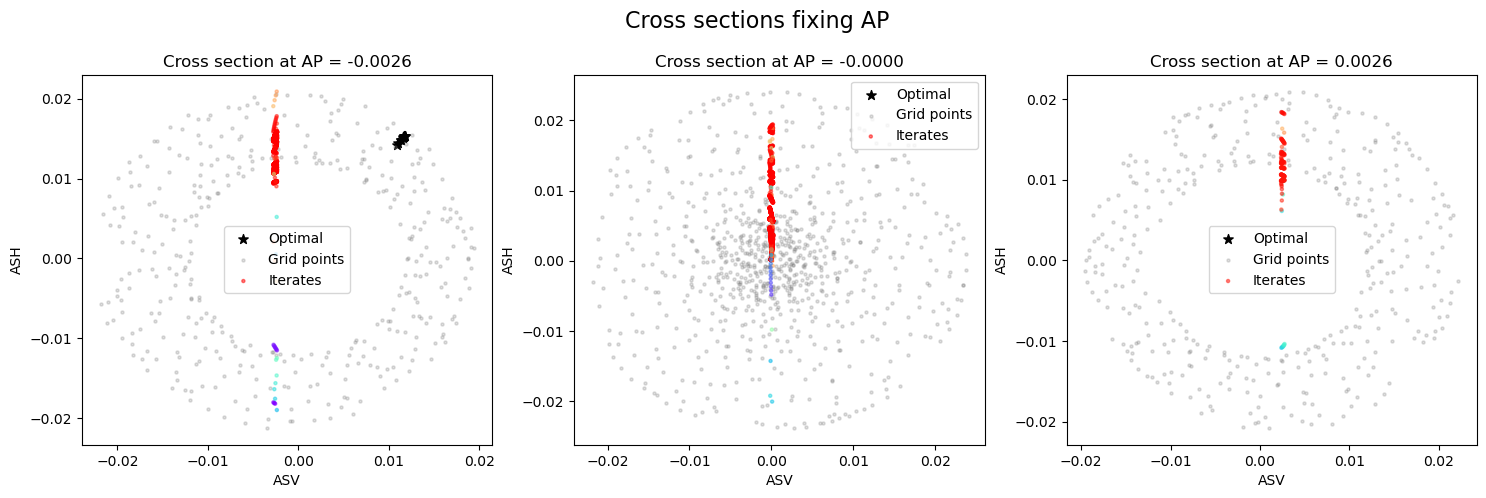

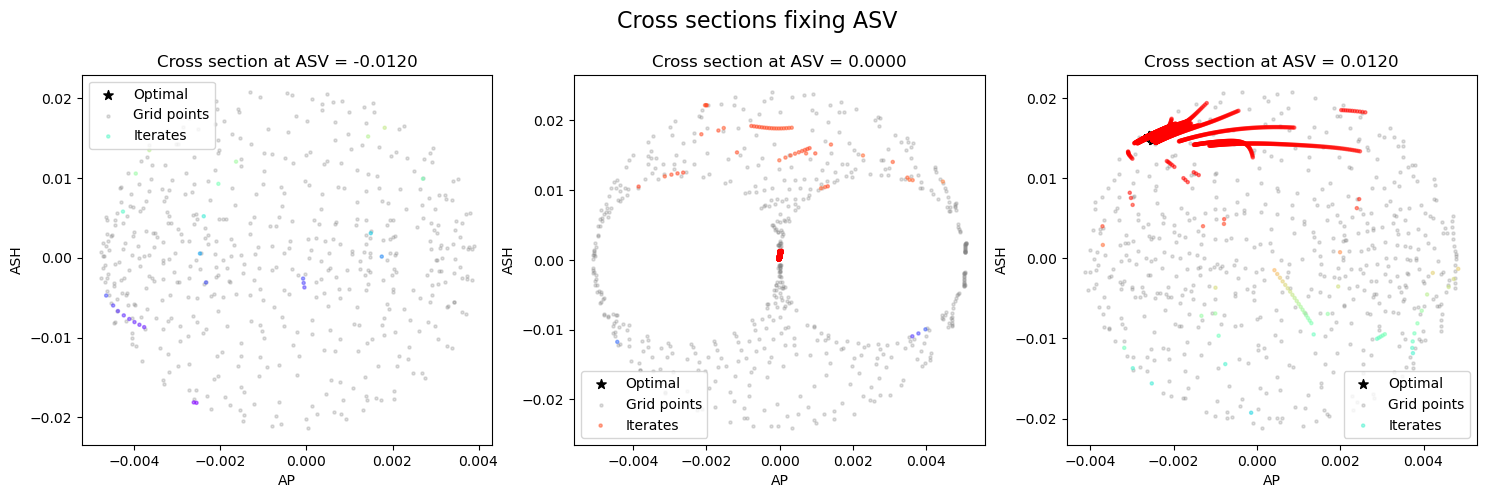

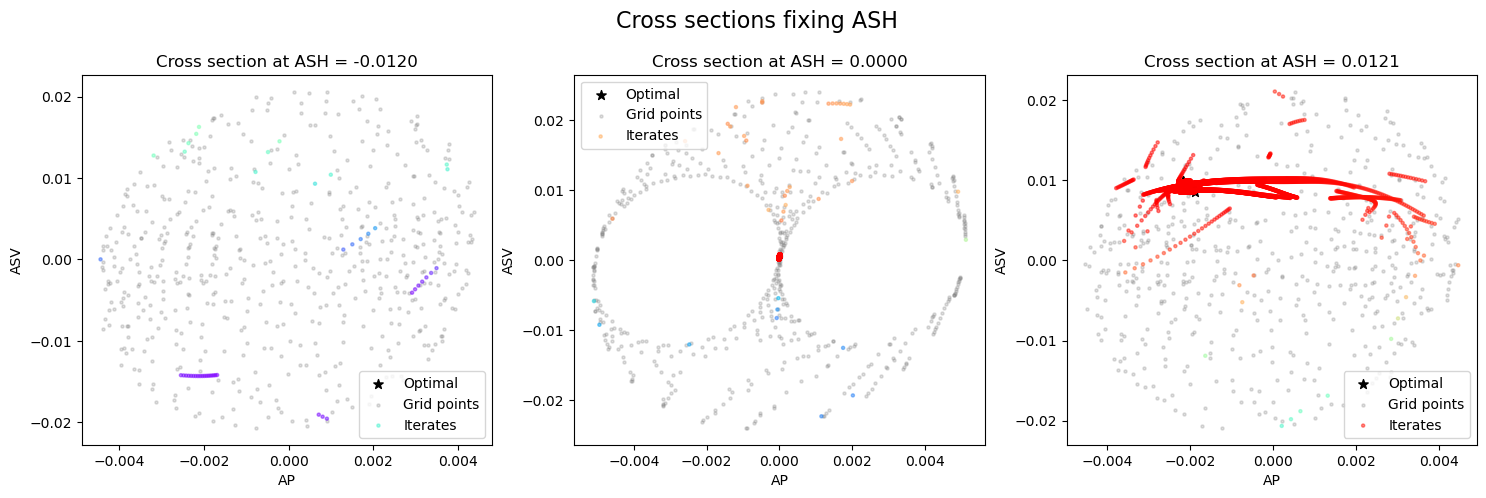

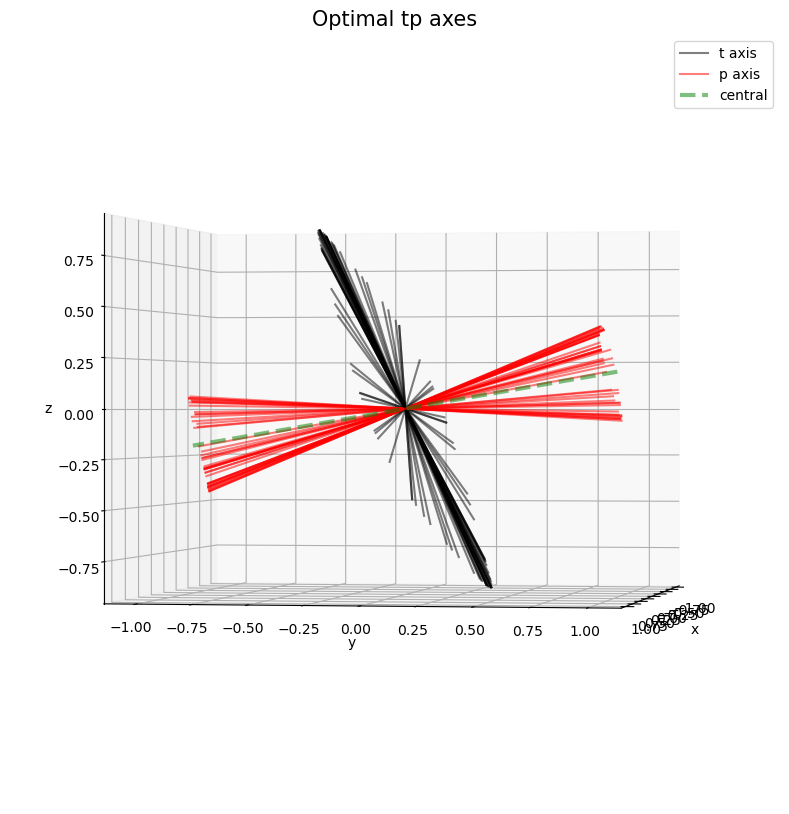

In [6]:
seed = 2025
np.random.seed(seed)
print(f'Seed: {seed}')

t, p = fn.i_hat, fn.j_hat

# get true params for synthetic test
true_params = fn.tp2sdr(t, p, True)[0]
print('Original params: ', true_params)

# plot corresponding beachball
beachball = fn.beachball(true_params)

# set up parameters for inversion
model = TauPyModel(model='ak135')  # velocity model
# model = TauPyModel(model='iasp...')
hdepth = 15  # km - assumed quake depth
epdist = 10  # degrees - epicentral distance
azimuth = 200  # degrees - azimuth of seismometer
p_arrivals = model.get_travel_times(source_depth_in_km=hdepth,
                        distance_in_degree=epdist, phase_list=['P'])
s_arrivals = model.get_travel_times(source_depth_in_km=hdepth,
                        distance_in_degree=epdist, phase_list=['S'])
takeoff_angles = [p_arrivals[0].takeoff_angle, s_arrivals[0].takeoff_angle]

# for other depths, extract velocities from lookup table
velocities = np.array([5.8000, 3.4600])

# initialize model
radiation_model = rm.RadiationModel(np.deg2rad(azimuth),
                                    takeoff_angles, velocities)

model_Ao = radiation_model(np.deg2rad(true_params), set_Ao=True,
                           return_A=True)

# tune hyperparameters
config = opt.get_config()

# multistart optimization
num_starts = 50
starts = fn.random_params(num_starts)

radiation_model.reset()
print_every = 10

for index, start in enumerate(starts):
    if print_every > 0 and index % print_every == 0:
        print(f'Run {index} of {num_starts}')
    opt.minimize(radiation_model, config, start)
    
print(f'Convergence rate: {radiation_model.get_convergence_rate():.0f}%')

# the dense parameterization in one space
params, error, position = radiation_model.get_optimal_parameters(z_threshold=2)
name = 'T' if position == 0 else 'P'

print(f'Constrained axis: {name}')
print(f'Optimal parameters: {np.rad2deg(params)}')
print(f'Search error: {np.rad2deg(error)} degrees')

# plots.half_angles(radiation_model, bins=10)

# best-fitting mechanisms
plots.beachballs(radiation_model, central=False, order_by='strike')

# fix parameters (mechanism), vary hyperparameters (station location)
radiation_model.reset_grid_amplitudes()
radiation_model.set_grid_amplitudes(3, random=False, fix_params=True)
plots.amplitudes(radiation_model, azim=200, elev=30, s=50, alpha=0.5,
                 iterates=True, grid=True, cross_section=[3,3,3],
                 eps_factor=2e-2, optimal=True, observed=True)

# fix hyperparameters (station location), vary parameters (mechanism)
radiation_model.reset_grid_amplitudes()
radiation_model.set_grid_amplitudes(7, random=False, fix_params=False)
plots.amplitudes(radiation_model, azim=200, elev=30, s=50, alpha=0.5,
                 iterates=True, grid=True, cross_section=[3,3,3],
                 eps_factor=2e-2, optimal=True, observed=True)

# tp axes, enz coordinates not yet implemented
plots.tp_axes(radiation_model, azim=10, elev=00, half=False, central=False)